In [1]:
#step 1 https://pycistopic.readthedocs.io/en/latest/notebooks/human_cerebellum.html#
#mtx, barcode, region files came from processed RDS npod1 multiome object
#/tscc/projects/ps-gaultonlab/rlmelton/megapanc/040725/240210_WE_nPOD_Multiome_hvw_window_adata_clustered_2:20_remove_samples.RDS
#stripped using Rscript /tscc/projects/ps-gaultonlab/abhowell/scenic_data/create_npod2_meta_forscenicplus.R 
#toward bottom of script
import os
os.chdir("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined")

In [7]:
import os
import pycisTopic
from pycisTopic.cistopic_class import create_cistopic_object

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
import pycisTopic
pycisTopic.__version__

'2.0a0'

In [3]:
import os
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

In [ ]:
fragments_dict = {
    "MM_661": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_661/outs/atac_fragments.tsv.gz",
    "MM_665": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_665/outs/atac_fragments.tsv.gz",
    "MM_665": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_665/outs/atac_fragments.tsv.gz",
    "MM_665": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_665/outs/atac_fragments.tsv.gz",
    "MM_665": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_665/outs/atac_fragments.tsv.gz",
    "MM_665": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_665/outs/atac_fragments.tsv.gz",
    "MM_665": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_665/outs/atac_fragments.tsv.gz",
    "MM_665": "/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/MM_665/outs/atac_fragments.tsv.gz"
}

In [123]:
import pandas as pd
#add metadata
meta_df = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_meta_data.tsv", header=0, sep="\t", index_col=0)
meta_df.head()

orig.ident  nCount_RNA  nFeature_RNA  \
MM_662_AAACAGCCATAACGGG-1  SeuratProject        4505          2155   
MM_662_AAACATGCAATTTGGT-1  SeuratProject        3641          1806   
MM_662_AAACATGCAGTAATAG-1  SeuratProject        2755          1511   
MM_662_AAACCAACAATGCCCG-1  SeuratProject        5080          2191   
MM_662_AAACCAACACTGGCTG-1  SeuratProject        4327          2001   

                           percent.mt  RNA_snn_res.1  seurat_clusters samples  \
MM_662_AAACAGCCATAACGGG-1         0.0              1                2  MM_662   
MM_662_AAACATGCAATTTGGT-1         0.0              5               11  MM_662   
MM_662_AAACATGCAGTAATAG-1         0.0              7                1  MM_662   
MM_662_AAACCAACAATGCCCG-1         0.0              9               11  MM_662   
MM_662_AAACCAACACTGGCTG-1         0.0              7                2  MM_662   

                          sex condition  RNA_snn_res.0.5 celltype_assignment1  \
MM_662_AAACAGCCATAACGGG-1   F       T1D                2               Acinar   
MM_662_AAACATGCAATTTGGT-1   F       T1D               11               Acinar   
MM_662_AAACATGCAGTAATAG-1   F       T1D                1               Acinar   
MM_662_AAACCAACAATGCCCG-1   F       T1D               11               Acinar   
MM_662_AAACCAACACTGGCTG-1   F       T1D                2               Acinar   

                          SeuratClusters celltype_assignment2  \
MM_662_AAACAGCCATAACGGG-1              2               Acinar   
MM_662_AAACATGCAATTTGGT-1             11               Acinar   
MM_662_AAACATGCAGTAATAG-1              1               Acinar   
MM_662_AAACCAACAATGCCCG-1             11               Acinar   
MM_662_AAACCAACACTGGCTG-1              2               Acinar   

                                    barcode             nPOD_barcode  \
MM_662_AAACAGCCATAACGGG-1  AAACAGCCATAACGGG  MM_662_AAACAGCCATAACGGG   
MM_662_AAACATGCAATTTGGT-1  AAACATGCAATTTGGT  MM_662_AAACATGCAATTTGGT   
MM_662_AAACATGCAGTAATAG-1  AAACATGCAGTAATAG  MM_662_AAACATGCAGTAATAG   
MM_662_AAACCAACAATGCCCG-1  AAACCAACAATGCCCG  MM_662_AAACCAACAATGCCCG   
MM_662_AAACCAACACTGGCTG-1  AAACCAACACTGGCTG  MM_662_AAACCAACACTGGCTG   

                          CurrentObjLabels     nPOD_ID technology  \
MM_662_AAACAGCCATAACGGG-1      Acinar1_2_6  multi_6220   multiome   
MM_662_AAACATGCAATTTGGT-1      Acinar1_2_6  multi_6220   multiome   
MM_662_AAACATGCAGTAATAG-1      Acinar1_2_6  multi_6220   multiome   
MM_662_AAACCAACAATGCCCG-1      Acinar1_2_6  multi_6220   multiome   
MM_662_AAACCAACACTGGCTG-1      Acinar1_2_6  multi_6220   multiome   

                           nCount_RAW_mtx  nFeature_RAW_mtx  
MM_662_AAACAGCCATAACGGG-1            4709              2256  
MM_662_AAACATGCAATTTGGT-1            3809              1885  
MM_662_AAACATGCAGTAATAG-1            2853              1567  
MM_662_AAACCAACAATGCCCG-1            5320              2291  
MM_662_AAACCAACACTGGCTG-1            4501              2085

In [5]:
import pandas as pd
chromsizes = pd.read_table(
    "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes",
    header = None,
    names = ["Chromosome", "End"]
)
chromsizes.insert(1, "Start", 0)
chromsizes.head()

Chromosome  Start        End
0       chr1      0  248956422
1       chr2      0  242193529
2       chr3      0  198295559
3       chr4      0  190214555
4       chr5      0  181538259

In [ ]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
os.makedirs(os.path.join(out_dir, "consensus_peak_calling"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"), exist_ok = True)

In [ ]:
bw_paths, bed_paths = export_pseudobulk(
    input_data = meta_df,
    variable = "celltype_assignment2",
    sample_id_col = "samples",
    chromsizes = chromsizes,
    bed_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"),
    bigwig_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"),
    path_to_fragments = fragments_dict,
    n_cpu = 20,
    normalize_bigwig = True,
    temp_dir = "/tmp",
    split_pattern = "-")

In [ ]:
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv"), "wt") as f:
    for v in bw_paths:
        _ = f.write(f"{v}\t{bw_paths[v]}\n")

In [ ]:
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv"), "wt") as f:
    for v in bed_paths:
        _ = f.write(f"{v}\t{bed_paths[v]}\n")

In [ ]:
bw_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bw_paths.update({v: p})

In [ ]:
bed_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bed_paths.update({v: p})

In [ ]:
from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = "macs2"

os.makedirs(os.path.join(out_dir, "consensus_peak_calling/MACS"), exist_ok = True)

narrow_peak_dict = peak_calling(
    macs_path = macs_path,
    bed_paths = bed_paths,
    outdir = os.path.join(os.path.join(out_dir, "consensus_peak_calling/MACS")),
    genome_size = 'hs',
    n_cpu = 10,
    input_format = 'BEDPE',
    shift = 73,
    ext_size = 146,
    keep_dup = 'all',
    q_value = 0.05,
    _temp_dir = '/tscc/lustre/ddn/scratch/abhowell'
)

In [ ]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks
# Other param
peak_half_width=250
path_to_blacklist="/tscc/nfs/home/abhowell/pycisTopic/blacklist/hg38-blacklist.v2.bed"
# Get consensus peaks
consensus_peaks = get_consensus_peaks(
    narrow_peaks_dict = narrow_peak_dict,
    peak_half_width = peak_half_width,
    chromsizes = chromsizes,
    path_to_blacklist = path_to_blacklist)

In [ ]:
#this gives a warning but it does make the file consensus_regions.bed so its fine
consensus_peaks.to_bed(
    path = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed"),
    keep =True,
    compression = 'infer',
    chain = False)

In [17]:
import pandas as pd
cell_names_tb = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_barcodes.tsv", header=None, sep="\t")
cell_names_tb

0
0      MM_662_AAACAGCCATAACGGG-1
1      MM_662_AAACATGCAATTTGGT-1
2      MM_662_AAACATGCAGTAATAG-1
3      MM_662_AAACCAACAATGCCCG-1
4      MM_662_AAACCAACACTGGCTG-1
...                          ...
17766  MM_661_TTTGTGAAGTGTTGCG-1
17767  MM_661_TTTGTGTTCCTGAATA-1
17768  MM_661_TTTGTGTTCCTTAATC-1
17769  MM_661_TTTGTTGGTACTTAGG-1
17770  MM_661_TTTGTTGGTGGATGTC-1

[17771 rows x 1 columns]

In [10]:
from scipy import io
path_to_blacklist="/tscc/nfs/home/abhowell/pycisTopic/blacklist/hg38-blacklist.v2.bed"
atac_count_matrix = io.mmread("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_atac_counts.mtx")
cell_names_tb = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_barcodes.tsv", header=None, sep="\t")
cell_names = cell_names_tb[0].tolist()
region_names_tb = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_region_names.tsv", header=None, sep="\t")
region_names = region_names_tb[0].tolist()
region_names = ["{}:{}-{}".format(*x.split("-")) for x in region_names]

cistopic_object = create_cistopic_object(
    fragment_matrix=atac_count_matrix.tocsr(),
    cell_names=cell_names,
    region_names=region_names,
    path_to_blacklist=path_to_blacklist,
    tag_cells=False
)

2025-04-16 14:36:16,226 cisTopic     INFO     Removing blacklisted regions
2025-04-16 14:36:18,875 cisTopic     INFO     Creating CistopicObject
2025-04-16 14:36:20,333 cisTopic     INFO     Done!


In [11]:
#add metadata
meta_df = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_meta_data.tsv", header=0, sep="\t", index_col=0)
cistopic_object.add_cell_data(meta_df)

In [13]:
meta_df.celltype_assignment2.value_counts()

Acinar                 14298
Ductal                  1238
Activated_stellate       760
Macrophage               380
Alpha                    364
T_cells                  205
Endothelial              163
Beta                     141
MUC5b_Ductal              88
Quinscient_stellate       73
LymphEndo                 31
Delta                     21
B_cells                    5
Schwann                    3
Mast                       1
Name: celltype_assignment2, dtype: int64

In [14]:
pickle.dump(
    cistopic_object,
    open("cistopic_object.pkl", "wb")
)

In [16]:
!mkdir -p mallet/

In [31]:
#!wget https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
#!tar -xf Mallet-202108-bin.tar.gz

In [ ]:
os.environ['MALLET_MEMORY'] = '600G'
from pycisTopic.lda_models import run_cgs_models_mallet
# Configure path Mallet
mallet_path="/tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/Mallet-202108/bin/mallet"
# Run models
models=run_cgs_models_mallet(
    cistopic_object,
    n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    n_cpu=30,
    n_iter=500,
    random_state=555,
    alpha=50,
    alpha_by_topic=True,
    eta=0.1,
    eta_by_topic=False,
    tmp_path="/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/mallet",
    save_path="/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/mallet",
    mallet_path=mallet_path,
)

2025-04-16 14:41:23,196 cisTopic     INFO     Formatting input to corpus
2025-04-16 14:41:24,025 cisTopic     INFO     Running model with 2 topics
2025-04-16 14:41:24,027 LDAMalletWrapper INFO     Serializing temporary corpus to /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/mallet/corpus.txt
2025-04-16 14:41:35,854 LDAMalletWrapper INFO     Converting temporary corpus to MALLET format with: /tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/Mallet-202108/bin/mallet import-file --preserve-case --keep-sequence --token-regex \S+ --input /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/mallet/corpus.txt --output /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/mallet/corpus.mallet
2025-04-16 14:41:47,752 LDAMalletWrapper INFO     Training MALLET LDA with: /tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/Mallet-202108/bin/mallet train-topics --input /tscc/projects/ps-gaultonlab/projec

In [ ]:
pickle.dump(
    models,
    open(os.path.join(out_dir, "models.pkl"), "wb")
)

In [ ]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    select_model = 40,
    return_model = True
)

In [ ]:
cistopic_obj.add_LDA_model(model)

In [ ]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

In [90]:
#this was when you tried to readin regions, mtx, barcodes from data procssed within scenic - not working
#region_names_tb = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs/consensus_peak_calling/consensus_regions.bed", header=None, sep="\t")
#region_names = region_names_tb.iloc[:, 0:3].astype(str)
#region_names
#region_names_tb.iloc[:, 1]  =  region_names_tb.iloc[:, 1].astype(str)
#region_names_tb.iloc[:, 2] = region_names_tb.iloc[:, 2].astype(str)
# Combine columns with different delimiters
##region_names_tb_format = region_names_tb.iloc[:, 0] + ":" + region_names_tb.iloc[:, 1] + "-" + region_names_tb.iloc[:, 2]
#region_names_tb_format = region_names_tb_format.astype(str)
#region_names_tb_format = region_names_tb_format.tolist()
#type(region_names_tb_format)

In [92]:
import pickle
pickle.dump(
    cistopic_object,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 13.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.1%
Elapsed time: 207.7 seconds
Detected doublet rate = 7.0%
Estimated detectable doublet fraction = 32.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 21.6%


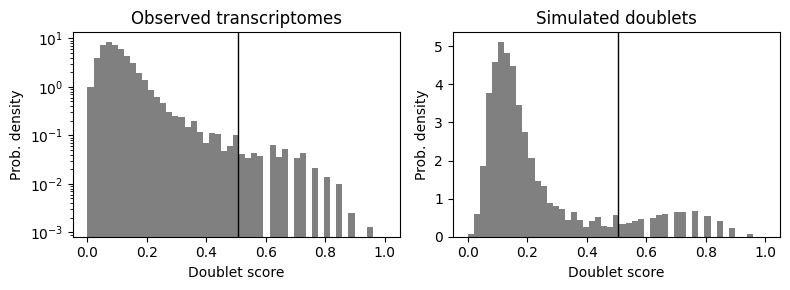

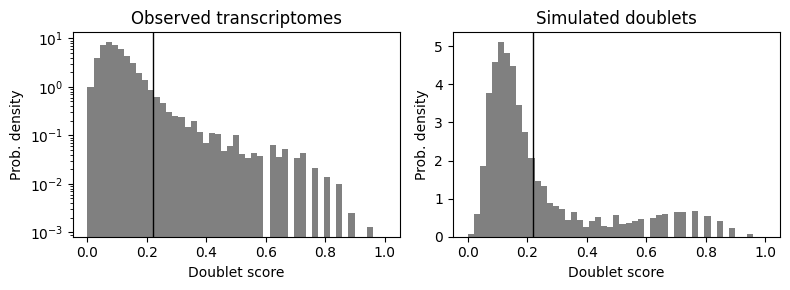

In [94]:
import scrublet as scr
scrub = scr.Scrublet(cistopic_object.fragment_matrix.T, expected_doublet_rate=0.1)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
scrub.plot_histogram();
scrub.call_doublets(threshold=0.22)
scrub.plot_histogram();
scrublet = pd.DataFrame([scrub.doublet_scores_obs_, scrub.predicted_doublets_], columns=cistopic_object.cell_names, index=['Doublet_scores_fragments', 'Predicted_doublets_fragments']).T

In [97]:
cistopic_object.add_cell_data(scrublet, split_pattern = '-')
sum(cistopic_object.cell_data.Predicted_doublets_fragments == True)
#if this is high you don't have to do the next step 
#idk how much we trust scrublet and this dataset should already be filtered

Columns ['Doublet_scores_fragments', 'Predicted_doublets_fragments'] will be overwritten


2705

In [20]:
# Remove doublets
singlets = cistopic_obj.cell_data[cistopic_obj.cell_data.Predicted_doublets_fragments == False].index.tolist()
# Subset cisTopic object
cistopic_obj_noDBL = cistopic_obj.subset(singlets, copy=True, split_pattern='-')
print(cistopic_obj_noDBL)
#check if scrublet tanks cell numbers
counts = cistopic_obj_noDBL.cell_data.celltype_assignment2.value_counts()
print(counts)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 158866 × 363751
Acinar                 3432
Ductal                  345
Activated_stellate      330
Alpha                   262
Macrophage              221
T_cells                 112
Endothelial              79
Beta                     48
Quinscient_stellate      45
LymphEndo                45
MUC5b_Ductal             28
B_cells                  24
Delta                    22
Schwann                  11
Mast                      6
Name: celltype_assignment2, dtype: int64


In [21]:
#resave object wiht doublets removed it you chose to
cistopic_obj = cistopic_obj_noDBL 
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

In [57]:
#if you got bumped from notebook on tscc you can reload pickle file like this
import pickle
with open('/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs/cistopic_obj.pkl', 'rb') as file:
    # Load the pickled object
    cistopic_obj = pickle.load(file)

In [119]:
cistopic_obj.selected_model.cell_topic

AAACAGCCACCTCGCT-1-MM_510  AAACAGCCAGTAAAGC-1-MM_510  \
Topic1                    0.026204                   0.021682   
Topic2                    0.006374                   0.024557   
Topic3                    0.080028                   0.053785   
Topic4                    0.114023                   0.035098   
Topic5                    0.003541                   0.012099   
Topic6                    0.046034                   0.027911   
Topic7                    0.009207                   0.022161   
Topic8                    0.006374                   0.005391   
Topic9                    0.003541                   0.006349   
Topic10                   0.017705                   0.010661   
Topic11                   0.037535                   0.023598   
Topic12                   0.006374                   0.016890   
Topic13                   0.006374                   0.019286   
Topic14                   0.014873                   0.004911   
Topic15                   0.026204                   0.029828   
Topic16                   0.091360                   0.004432   
Topic17                   0.003541                   0.021682   
Topic18                   0.006374                   0.016890   
Topic19                   0.020538                   0.091639   
Topic20                   0.020538                   0.005870   
Topic21                   0.003541                   0.000599   
Topic22                   0.040368                   0.064327   
Topic23                   0.020538                   0.001078   
Topic24                   0.023371                   0.025994   
Topic25                   0.012040                   0.009703   
Topic26                   0.014873                   0.001557   
Topic27                   0.012040                   0.010661   
Topic28                   0.017705                   0.011140   
Topic29                   0.006374                   0.007307   
Topic30                   0.014873                   0.010661   
Topic31                   0.003541                   0.002516   
Topic32                   0.048867                   0.023119   
Topic33                   0.003541                   0.002995   
Topic34                   0.006374                   0.002036   
Topic35                   0.060198                   0.120867   
Topic36                   0.006374                   0.112722   
Topic37                   0.026204                   0.025036   
Topic38                   0.003541                   0.015932   
Topic39                   0.006374                   0.057139   
Topic40                   0.122521                   0.039890   

         AAACATGCAAACCCTA-1-MM_510  AAACATGCACCCACAG-1-MM_510  \
Topic1                    0.003261                   0.030805   
Topic2                    0.001285                   0.000556   
Topic3                    0.005237                   0.008563   
Topic4                    0.000889                   0.071286   
Topic5                    0.022628                   0.011232   
Topic6                    0.006028                   0.030805   
Topic7                    0.015909                   0.053492   
Topic8                    0.001285                   0.005449   
Topic9                    0.003261                   0.012122   
Topic10                   0.003261                   0.002335   
Topic11                   0.008399                   0.013901   
Topic12                   0.003261                   0.013456   
Topic13                   0.042391                   0.013012   
Topic14                   0.011561                   0.003225   
Topic15                   0.044368                   0.041481   
Topic16                   0.004447                   0.029915   
Topic17                   0.007609                   0.066392   
Topic18                   0.000889                   0.029026   
Topic19                   0.001285                   0.029915   
Topic20                   0.014723         

In [58]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

In [59]:
find_clusters(
    cistopic_obj,
    target  = 'cell',
    k = 10,
    res = [0.2, 0.3, 0.6, 1.2, 3],
    prefix = 'pycisTopic_',
    scale = True,
    split_pattern = '-'
)

2025-04-18 12:21:24,094 cisTopic     INFO     Finding neighbours


In [60]:
run_umap(
    cistopic_obj,
    target  = 'cell', scale=True)

2025-04-18 12:21:48,188 cisTopic     INFO     Running UMAP


/tscc/nfs/home/abhowell/miniconda3/envs/scenicplus/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [61]:
run_tsne(
    cistopic_obj,
    target  = 'cell', scale=True)

2025-04-18 12:22:10,783 cisTopic     INFO     Running TSNE


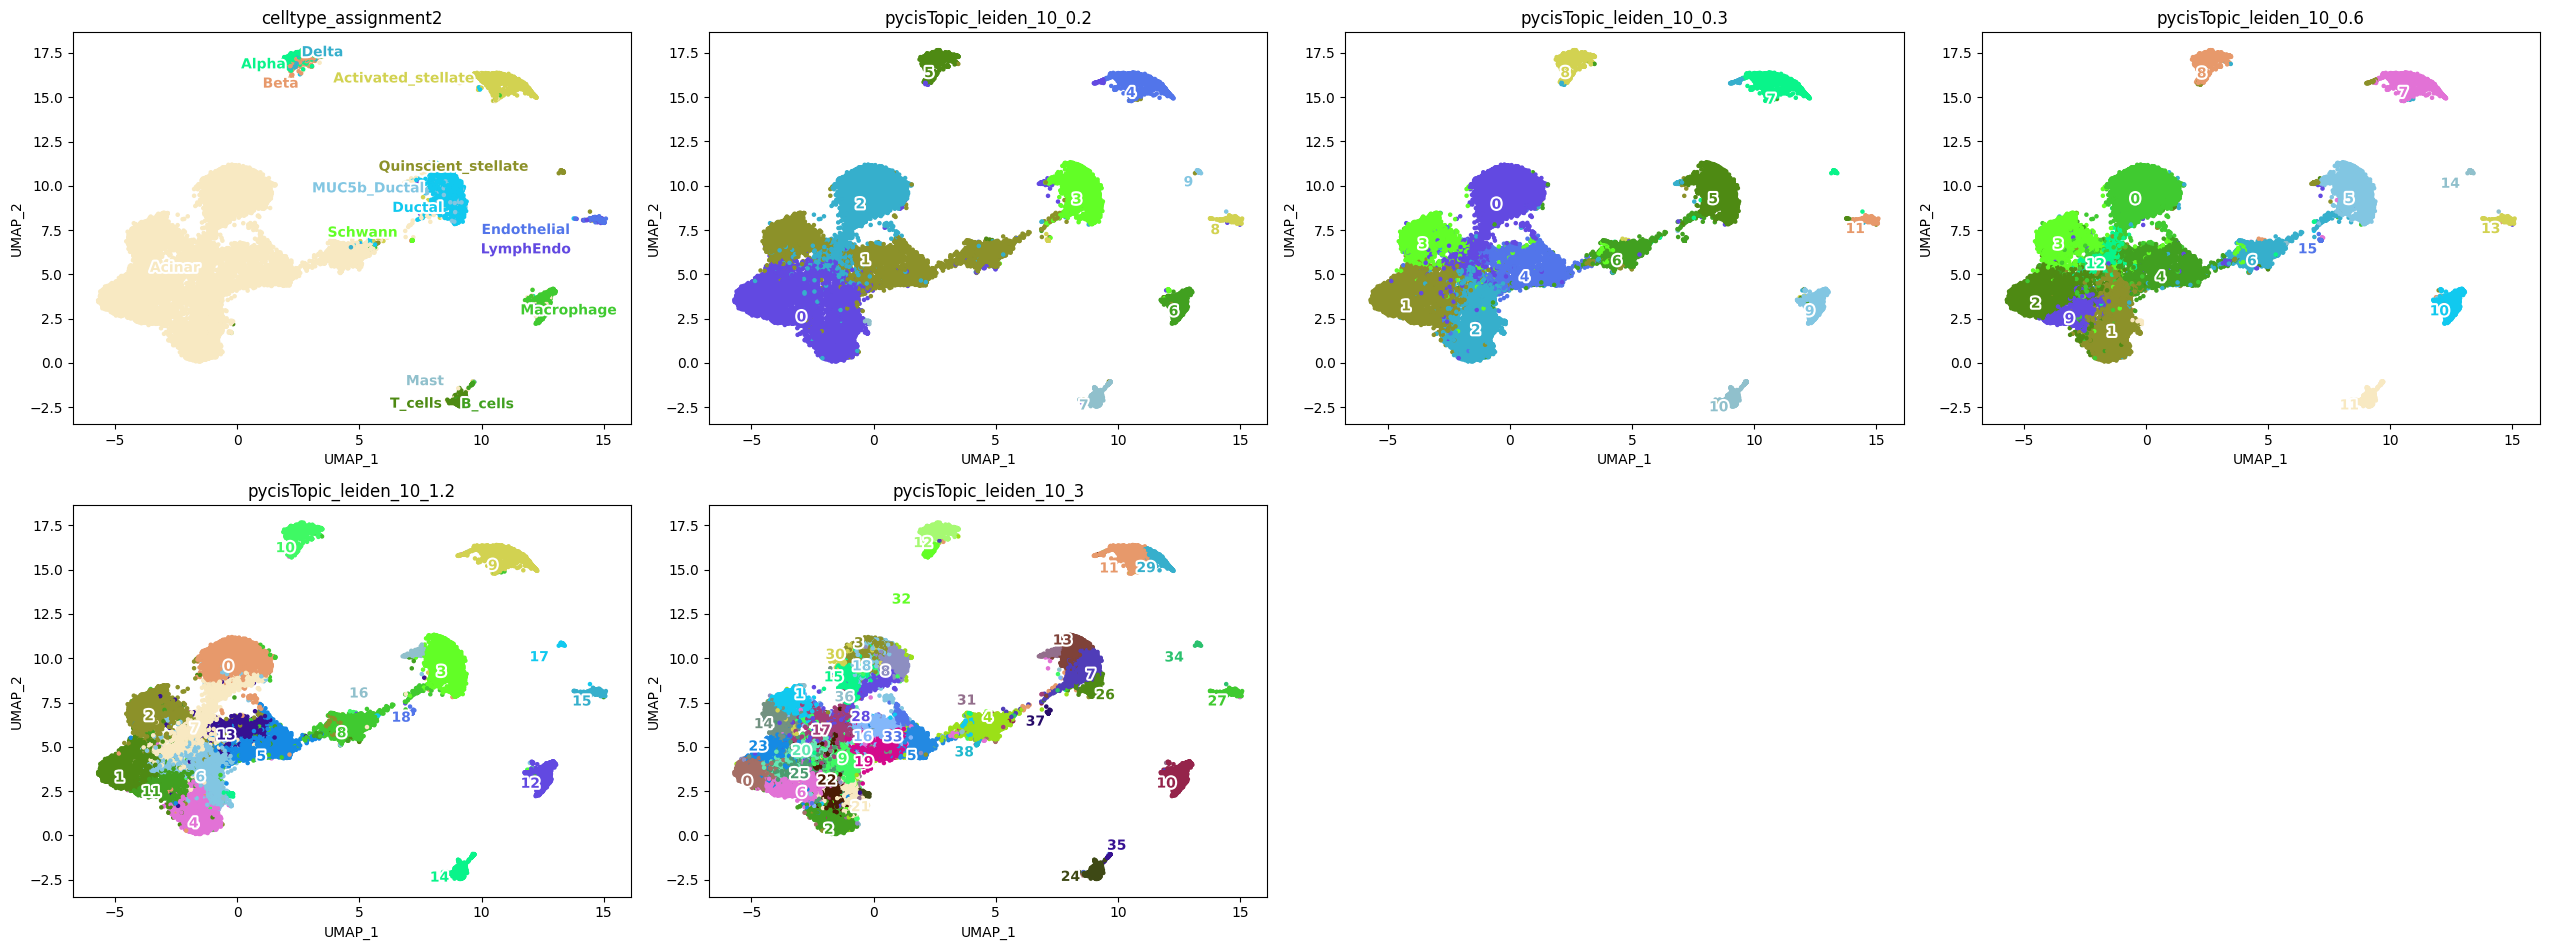

In [62]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['celltype_assignment2', 'pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [71]:
annot_dict = {}
for resolution in [0.2, 0.3, 0.6]:
    annot_dict[f"pycisTopic_leiden_10_{resolution}"] = {}
    for cluster in set(cistopic_obj.cell_data[f"pycisTopic_leiden_10_{resolution}"]):
        counts = cistopic_obj.cell_data.loc[
            cistopic_obj.cell_data.loc[cistopic_obj.cell_data[f"pycisTopic_leiden_10_{resolution}"] == cluster].index,
            "celltype_assignment2"].value_counts()
        annot_dict[f"pycisTopic_leiden_10_{resolution}"][cluster] = f"{counts.index[counts.argmax()]}({cluster})"

In [72]:
annot_dict

{'pycisTopic_leiden_10_0.2': {'Ductal(3)': 'Ductal(Ductal(3))',
  'Acinar(0)': 'Acinar(Acinar(0))',
  'Acinar(1)': 'Acinar(Acinar(1))',
  'Alpha(5)': 'Alpha(Alpha(5))',
  'Activated_stellate(4)': 'Activated_stellate(Activated_stellate(4))',
  'Acinar(2)': 'Acinar(Acinar(2))',
  'Quinscient_stellate(9)': 'Quinscient_stellate(Quinscient_stellate(9))',
  'Macrophage(6)': 'Macrophage(Macrophage(6))',
  'T_cells(7)': 'T_cells(T_cells(7))',
  'Endothelial(8)': 'Endothelial(Endothelial(8))'},
 'pycisTopic_leiden_10_0.3': {'T_cells(10)': 'T_cells(T_cells(10))',
  'Acinar(0)': 'Acinar(Acinar(0))',
  'Acinar(1)': 'Acinar(Acinar(1))',
  'Macrophage(9)': 'Macrophage(Macrophage(9))',
  'Acinar(6)': 'Acinar(Acinar(6))',
  'Alpha(8)': 'Alpha(Alpha(8))',
  'Acinar(2)': 'Acinar(Acinar(2))',
  'Activated_stellate(7)': 'Activated_stellate(Activated_stellate(7))',
  'Endothelial(11)': 'Endothelial(Endothelial(11))',
  'Ductal(5)': 'Ductal(Ductal(5))',
  'Acinar(3)': 'Acinar(Acinar(3))',
  'Acinar(4)': 'Ac

In [73]:
for resolution in [0.2, 0.3, 0.6,]:
    cistopic_obj.cell_data[f'pycisTopic_leiden_10_{resolution}'] = [
        annot_dict[f'pycisTopic_leiden_10_{resolution}'][x] for x in cistopic_obj.cell_data[f'pycisTopic_leiden_10_{resolution}'].tolist()
    ]

In [ ]:
cistopic_obj.cell_data[f'pycisTopic_leiden_10_0.2'] = [
        annot_dict[f'pycisTopic_leiden_10_{resolution}'][x] for x in cistopic_obj.cell_data[f'pycisTopic_leiden_10_{resolution}'].tolist()
    ]

In [75]:
cistopic_obj.cell_data[f'pycisTopic_leiden_10_0.2']

AAACAGCCACCTCGCT-1-MM_510      Acinar(Acinar(1))
AAACAGCCAGTAAAGC-1-MM_510      Acinar(Acinar(0))
AAACATGCAAACCCTA-1-MM_510    T_cells(T_cells(7))
AAACATGCACCCACAG-1-MM_510      Acinar(Acinar(0))
AAACATGCATACCCGG-1-MM_510      Acinar(Acinar(0))
                                    ...         
TTTGTTGGTCAAACTG-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTCCTAATC-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTTCGGTAA-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTTGCTTCG-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTTGGATAT-1-MM_667      Acinar(Acinar(2))
Name: pycisTopic_leiden_10_0.2, Length: 38789, dtype: object

In [77]:
cistopic_obj.cell_data['pycisTopic_leiden_10_0.2']

AAACAGCCACCTCGCT-1-MM_510      Acinar(Acinar(1))
AAACAGCCAGTAAAGC-1-MM_510      Acinar(Acinar(0))
AAACATGCAAACCCTA-1-MM_510    T_cells(T_cells(7))
AAACATGCACCCACAG-1-MM_510      Acinar(Acinar(0))
AAACATGCATACCCGG-1-MM_510      Acinar(Acinar(0))
                                    ...         
TTTGTTGGTCAAACTG-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTCCTAATC-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTTCGGTAA-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTTGCTTCG-1-MM_667      Acinar(Acinar(2))
TTTGTTGGTTGGATAT-1-MM_667      Acinar(Acinar(2))
Name: pycisTopic_leiden_10_0.2, Length: 38789, dtype: object

In [78]:
cistopic_obj.cell_data

cisTopic_log_nr_acc cisTopic_nr_acc  \
AAACAGCCACCTCGCT-1-MM_510            2.481443             303   
AAACAGCCAGTAAAGC-1-MM_510            3.308991            2037   
AAACATGCAAACCCTA-1-MM_510            3.394452            2480   
AAACATGCACCCACAG-1-MM_510            3.342028            2198   
AAACATGCATACCCGG-1-MM_510            2.838219             689   
...                                       ...             ...   
TTTGTTGGTCAAACTG-1-MM_667            2.482874             304   
TTTGTTGGTCCTAATC-1-MM_667             3.09237            1237   
TTTGTTGGTTCGGTAA-1-MM_667            3.259833            1819   
TTTGTTGGTTGCTTCG-1-MM_667            2.260071             182   
TTTGTTGGTTGGATAT-1-MM_667             3.11227            1295   

                          cisTopic_log_nr_frag sample_id cisTopic_nr_frag  \
AAACAGCCACCTCGCT-1-MM_510             2.819544  cisTopic              660   
AAACAGCCAGTAAAGC-1-MM_510             3.739731  cisTopic             5492   
AAACATGCAAACCCTA-1-MM_510             3.831998  cisTopic             6792   
AAACATGCACCCACAG-1-MM_510             3.773713  cisTopic             5939   
AAACATGCATACCCGG-1-MM_510             3.189771  cisTopic             1548   
...                                        ...       ...              ...   
TTTGTTGGTCAAACTG-1-MM_667             2.790988  cisTopic              618   
TTTGTTGGTCCTAATC-1-MM_667              3.46879  cisTopic             2943   
TTTGTTGGTTCGGTAA-1-MM_667             3.668665  cisTopic             4663   
TTTGTTGGTTGCTTCG-1-MM_667             2.557507  cisTopic              361   
TTTGTTGGTTGGATAT-1-MM_667             3.513617  cisTopic             3263   

                              orig.ident  nCount_RNA  nFeature_RNA  \
AAACAGCCACCTCGCT-1-MM_510  SeuratProject      2802.0        1298.0   
AAACAGCCAGTAAAGC-1-MM_510  SeuratProject      2097.0        1211.0   
AAACATGCAAACCCTA-1-MM_510  SeuratProject      1638.0        1045.0   
AAACATGCACCCACAG-1-MM_510  SeuratProject      5878.0        1956.0   
AAACATGCATACCCGG-1-MM_510  SeuratProject      1823.0        1090.0   
...                                  ...         ...           ...   
TTTGTTGGTCAAACTG-1-MM_667  SeuratProject      3630.0        1794.0   
TTTGTTGGTCCTAATC-1-MM_667  SeuratProject      5902.0        2416.0   
TTTGTTGGTTCGGTAA-1-MM_667  SeuratProject      2356.0        1273.0   
TTTGTTGGTTGCTTCG-1-MM_667  SeuratProject      1659.0        1093.0   
TTTGTTGGTTGGATAT-1-MM_667  SeuratProject      2704.0        1483.0   

                           percent.mt  RNA_snn_res.1  ...     nPOD_ID  \
AAACAGCCACCTCGCT-1-MM_510      0.0000            6.0  ...  multi_6229   
AAACAGCCAGTAAAGC-1-MM_510      0.0000            6.0  ...  multi_6229   
AAACATGCAAACCCTA-1-MM_510      0.3663           14.0  ...  multi_6229   
AAACATGCACCCACAG-1-MM_510      0.0000            2.0  ...  multi_6229   
AAACATGCATACCCGG-1-MM_510      0.0000            2.0  ...  multi_6229   
...                               ...            ...  ...         ...   
TTTGTTGGTCAAACTG-1-MM_667      0.0000            9.0  ...  multi_6267   
TTTGTTGGTCCTAATC-1-MM_667      0.0000            4.0  ...  multi_6267   
TTTGTTGGTTCGGTAA-1-MM_667      0.0000            5.0  ...  multi_6267   
TTTGTTGGTTGCTTCG-1-MM_667      0.0000            1.0  ...  multi_6267   
TTTGTTGGTTGGATAT-1-MM_667      0.0000            4.0  ...  multi_6267   

                          technology nCount_RAW_mtx nFeature_RAW_mtx  \
AAACAGCCACCTCGCT-1-MM_510   multiome         3992.0           1869.0   
AAACAGCCAGTAAAGC-1-MM_510   multiome         2889.0           1669.0   
AAACATGCAAACCCTA-1-MM_510   multiome         2091.0           1364.0   
AAACATGCACCCACAG-1-MM_510   multiome        10002.0           3466.0   
AAACATGCATACCCGG-1-MM_510   multiome         2393.0           1382.0   
...                              ...            ...              ...   
TTTGTTGGTCAAACTG-1-MM_667   multiome         4370.0           2147.0   
TTTGTTGGTCCTAATC-1-MM_667 

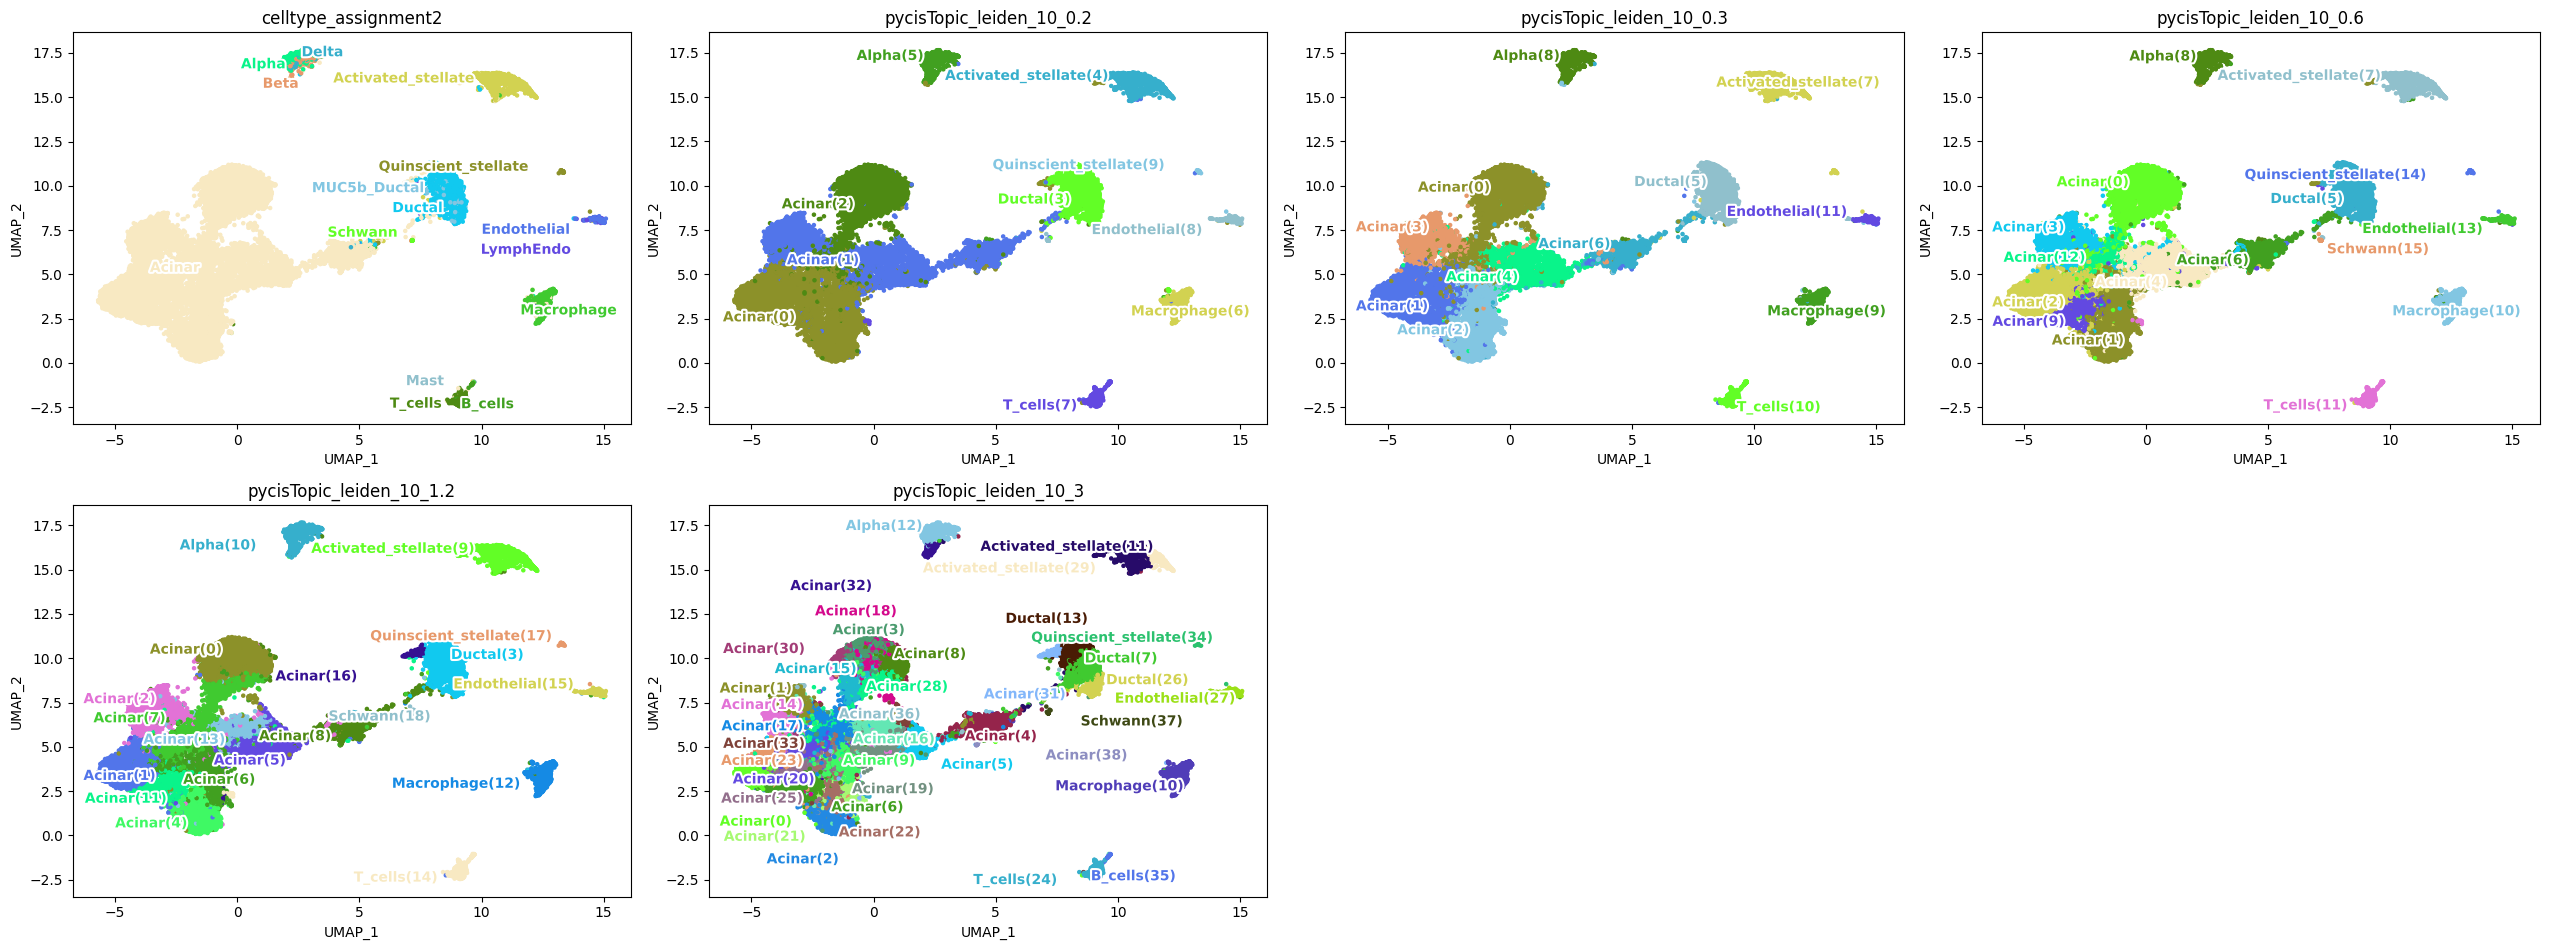

In [65]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['celltype_assignment2',  'pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [79]:
cistopic_obj.cell_data

cisTopic_log_nr_acc cisTopic_nr_acc  \
AAACAGCCACCTCGCT-1-MM_510            2.481443             303   
AAACAGCCAGTAAAGC-1-MM_510            3.308991            2037   
AAACATGCAAACCCTA-1-MM_510            3.394452            2480   
AAACATGCACCCACAG-1-MM_510            3.342028            2198   
AAACATGCATACCCGG-1-MM_510            2.838219             689   
...                                       ...             ...   
TTTGTTGGTCAAACTG-1-MM_667            2.482874             304   
TTTGTTGGTCCTAATC-1-MM_667             3.09237            1237   
TTTGTTGGTTCGGTAA-1-MM_667            3.259833            1819   
TTTGTTGGTTGCTTCG-1-MM_667            2.260071             182   
TTTGTTGGTTGGATAT-1-MM_667             3.11227            1295   

                          cisTopic_log_nr_frag sample_id cisTopic_nr_frag  \
AAACAGCCACCTCGCT-1-MM_510             2.819544  cisTopic              660   
AAACAGCCAGTAAAGC-1-MM_510             3.739731  cisTopic             5492   
AAACATGCAAACCCTA-1-MM_510             3.831998  cisTopic             6792   
AAACATGCACCCACAG-1-MM_510             3.773713  cisTopic             5939   
AAACATGCATACCCGG-1-MM_510             3.189771  cisTopic             1548   
...                                        ...       ...              ...   
TTTGTTGGTCAAACTG-1-MM_667             2.790988  cisTopic              618   
TTTGTTGGTCCTAATC-1-MM_667              3.46879  cisTopic             2943   
TTTGTTGGTTCGGTAA-1-MM_667             3.668665  cisTopic             4663   
TTTGTTGGTTGCTTCG-1-MM_667             2.557507  cisTopic              361   
TTTGTTGGTTGGATAT-1-MM_667             3.513617  cisTopic             3263   

                              orig.ident  nCount_RNA  nFeature_RNA  \
AAACAGCCACCTCGCT-1-MM_510  SeuratProject      2802.0        1298.0   
AAACAGCCAGTAAAGC-1-MM_510  SeuratProject      2097.0        1211.0   
AAACATGCAAACCCTA-1-MM_510  SeuratProject      1638.0        1045.0   
AAACATGCACCCACAG-1-MM_510  SeuratProject      5878.0        1956.0   
AAACATGCATACCCGG-1-MM_510  SeuratProject      1823.0        1090.0   
...                                  ...         ...           ...   
TTTGTTGGTCAAACTG-1-MM_667  SeuratProject      3630.0        1794.0   
TTTGTTGGTCCTAATC-1-MM_667  SeuratProject      5902.0        2416.0   
TTTGTTGGTTCGGTAA-1-MM_667  SeuratProject      2356.0        1273.0   
TTTGTTGGTTGCTTCG-1-MM_667  SeuratProject      1659.0        1093.0   
TTTGTTGGTTGGATAT-1-MM_667  SeuratProject      2704.0        1483.0   

                           percent.mt  RNA_snn_res.1  ...     nPOD_ID  \
AAACAGCCACCTCGCT-1-MM_510      0.0000            6.0  ...  multi_6229   
AAACAGCCAGTAAAGC-1-MM_510      0.0000            6.0  ...  multi_6229   
AAACATGCAAACCCTA-1-MM_510      0.3663           14.0  ...  multi_6229   
AAACATGCACCCACAG-1-MM_510      0.0000            2.0  ...  multi_6229   
AAACATGCATACCCGG-1-MM_510      0.0000            2.0  ...  multi_6229   
...                               ...            ...  ...         ...   
TTTGTTGGTCAAACTG-1-MM_667      0.0000            9.0  ...  multi_6267   
TTTGTTGGTCCTAATC-1-MM_667      0.0000            4.0  ...  multi_6267   
TTTGTTGGTTCGGTAA-1-MM_667      0.0000            5.0  ...  multi_6267   
TTTGTTGGTTGCTTCG-1-MM_667      0.0000            1.0  ...  multi_6267   
TTTGTTGGTTGGATAT-1-MM_667      0.0000            4.0  ...  multi_6267   

                          technology nCount_RAW_mtx nFeature_RAW_mtx  \
AAACAGCCACCTCGCT-1-MM_510   multiome         3992.0           1869.0   
AAACAGCCAGTAAAGC-1-MM_510   multiome         2889.0           1669.0   
AAACATGCAAACCCTA-1-MM_510   multiome         2091.0           1364.0   
AAACATGCACCCACAG-1-MM_510   multiome        10002.0           3466.0   
AAACATGCATACCCGG-1-MM_510   multiome         2393.0           1382.0   
...                              ...            ...              ...   
TTTGTTGGTCAAACTG-1-MM_667   multiome         4370.0           2147.0   
TTTGTTGGTCCTAATC-1-MM_667 

In [80]:
#the pycistopic leiden clusters are saved to the cell_data - export this to a csv to look at in R
cistopic_obj.cell_data.to_csv('/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/cistopic_obj_celldata.csv', index=False)

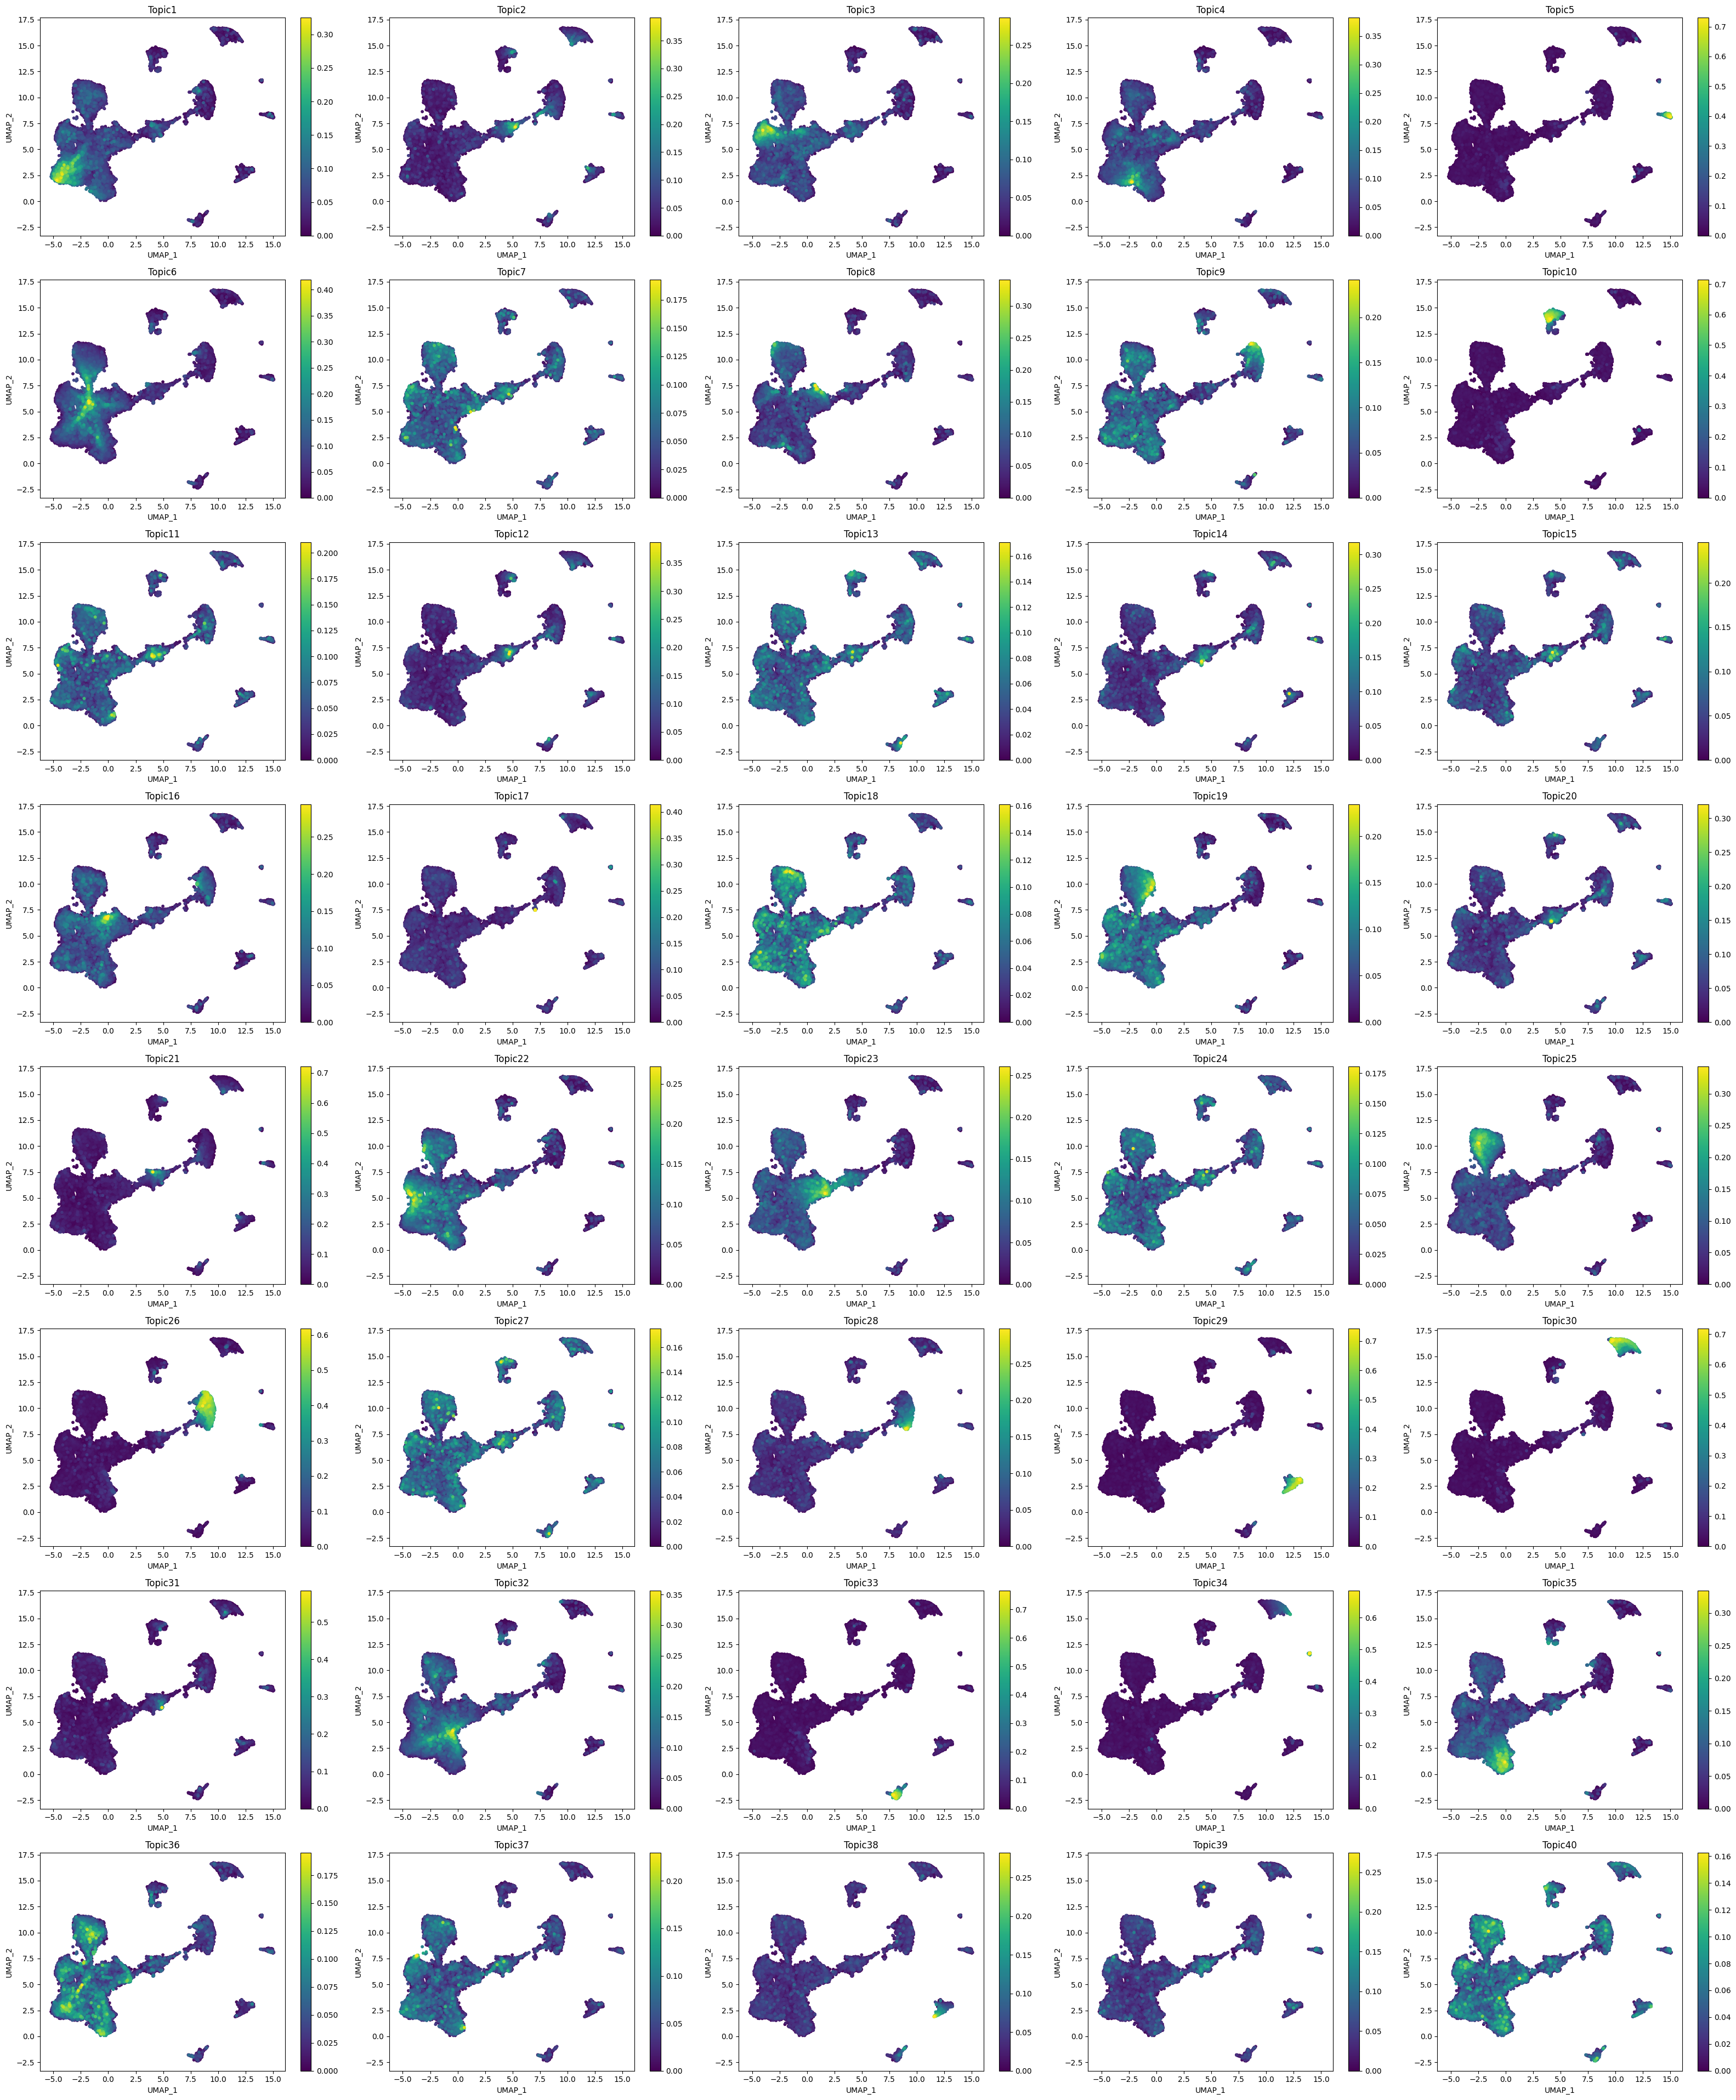

In [30]:
plot_topic(
    cistopic_obj,
    reduction_name = 'UMAP',
    target = 'cell',
    num_columns=5
)

In [31]:
from pycisTopic.topic_binarization import binarize_topics

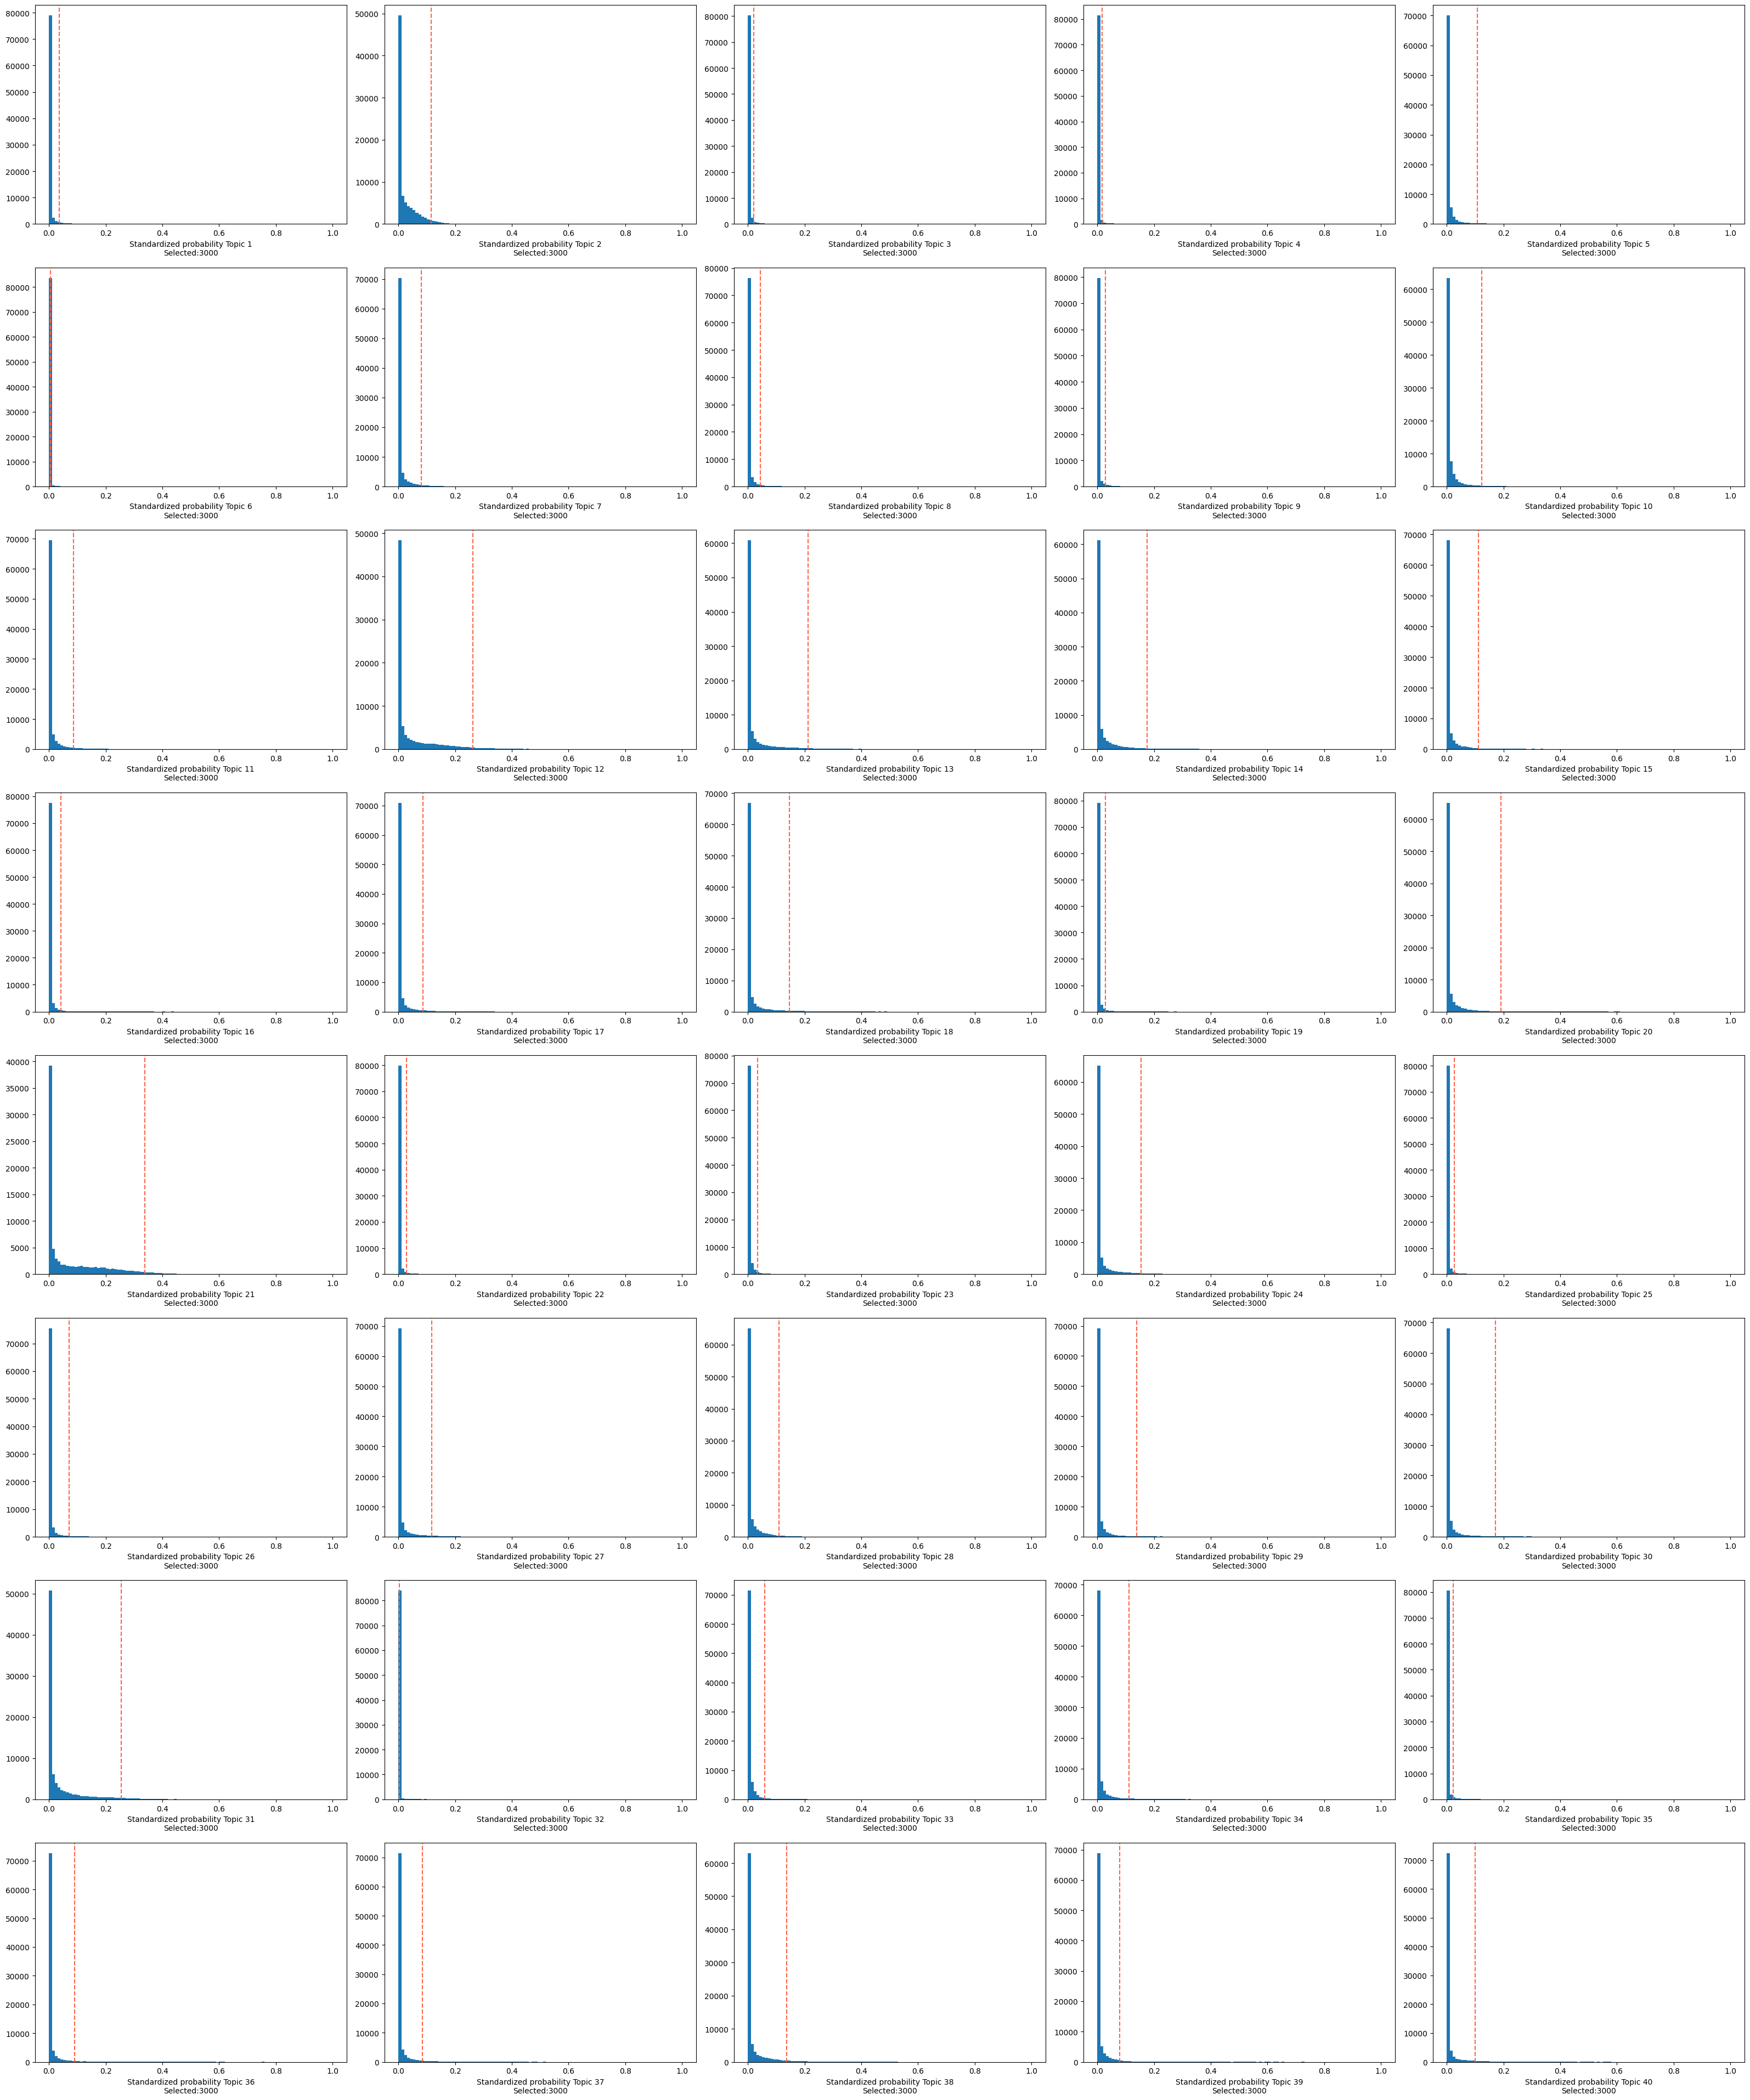

In [32]:
region_bin_topics_top_3k = binarize_topics(
    cistopic_obj, method='ntop', ntop = 3_000,
    plot=True, num_columns=5
)

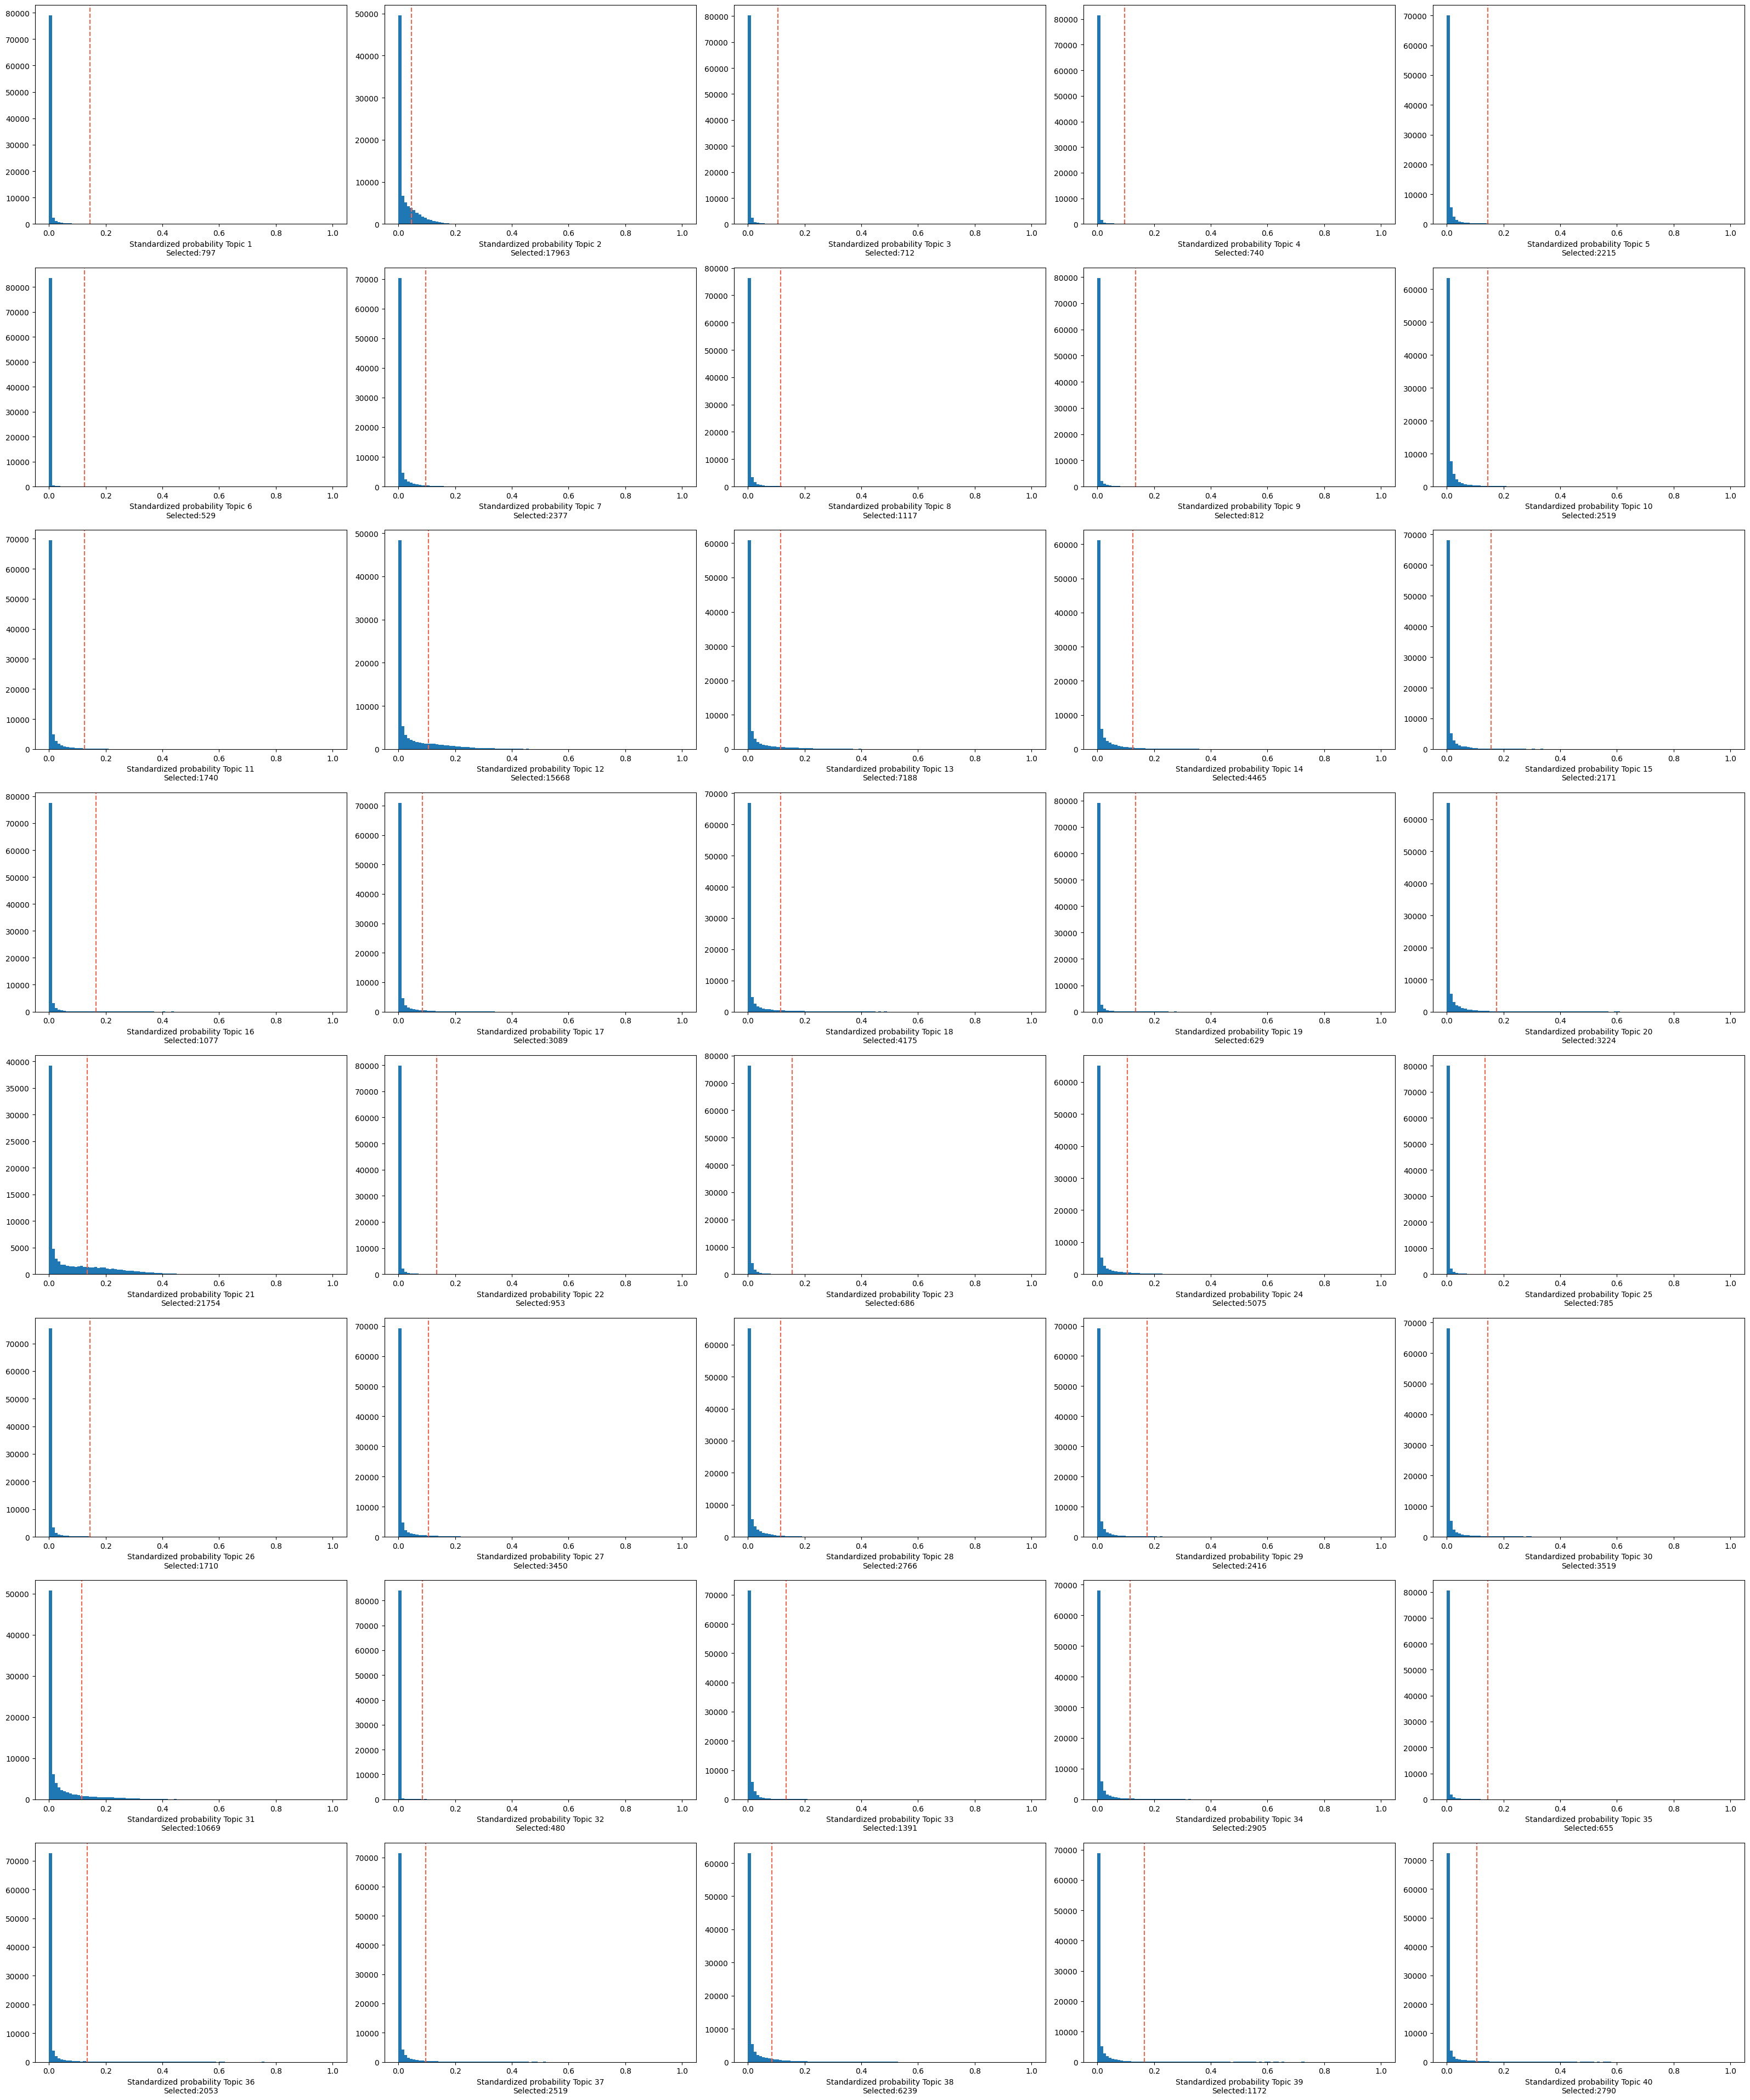

In [33]:
region_bin_topics_otsu = binarize_topics(
    cistopic_obj, method='otsu',
    plot=True, num_columns=5
)

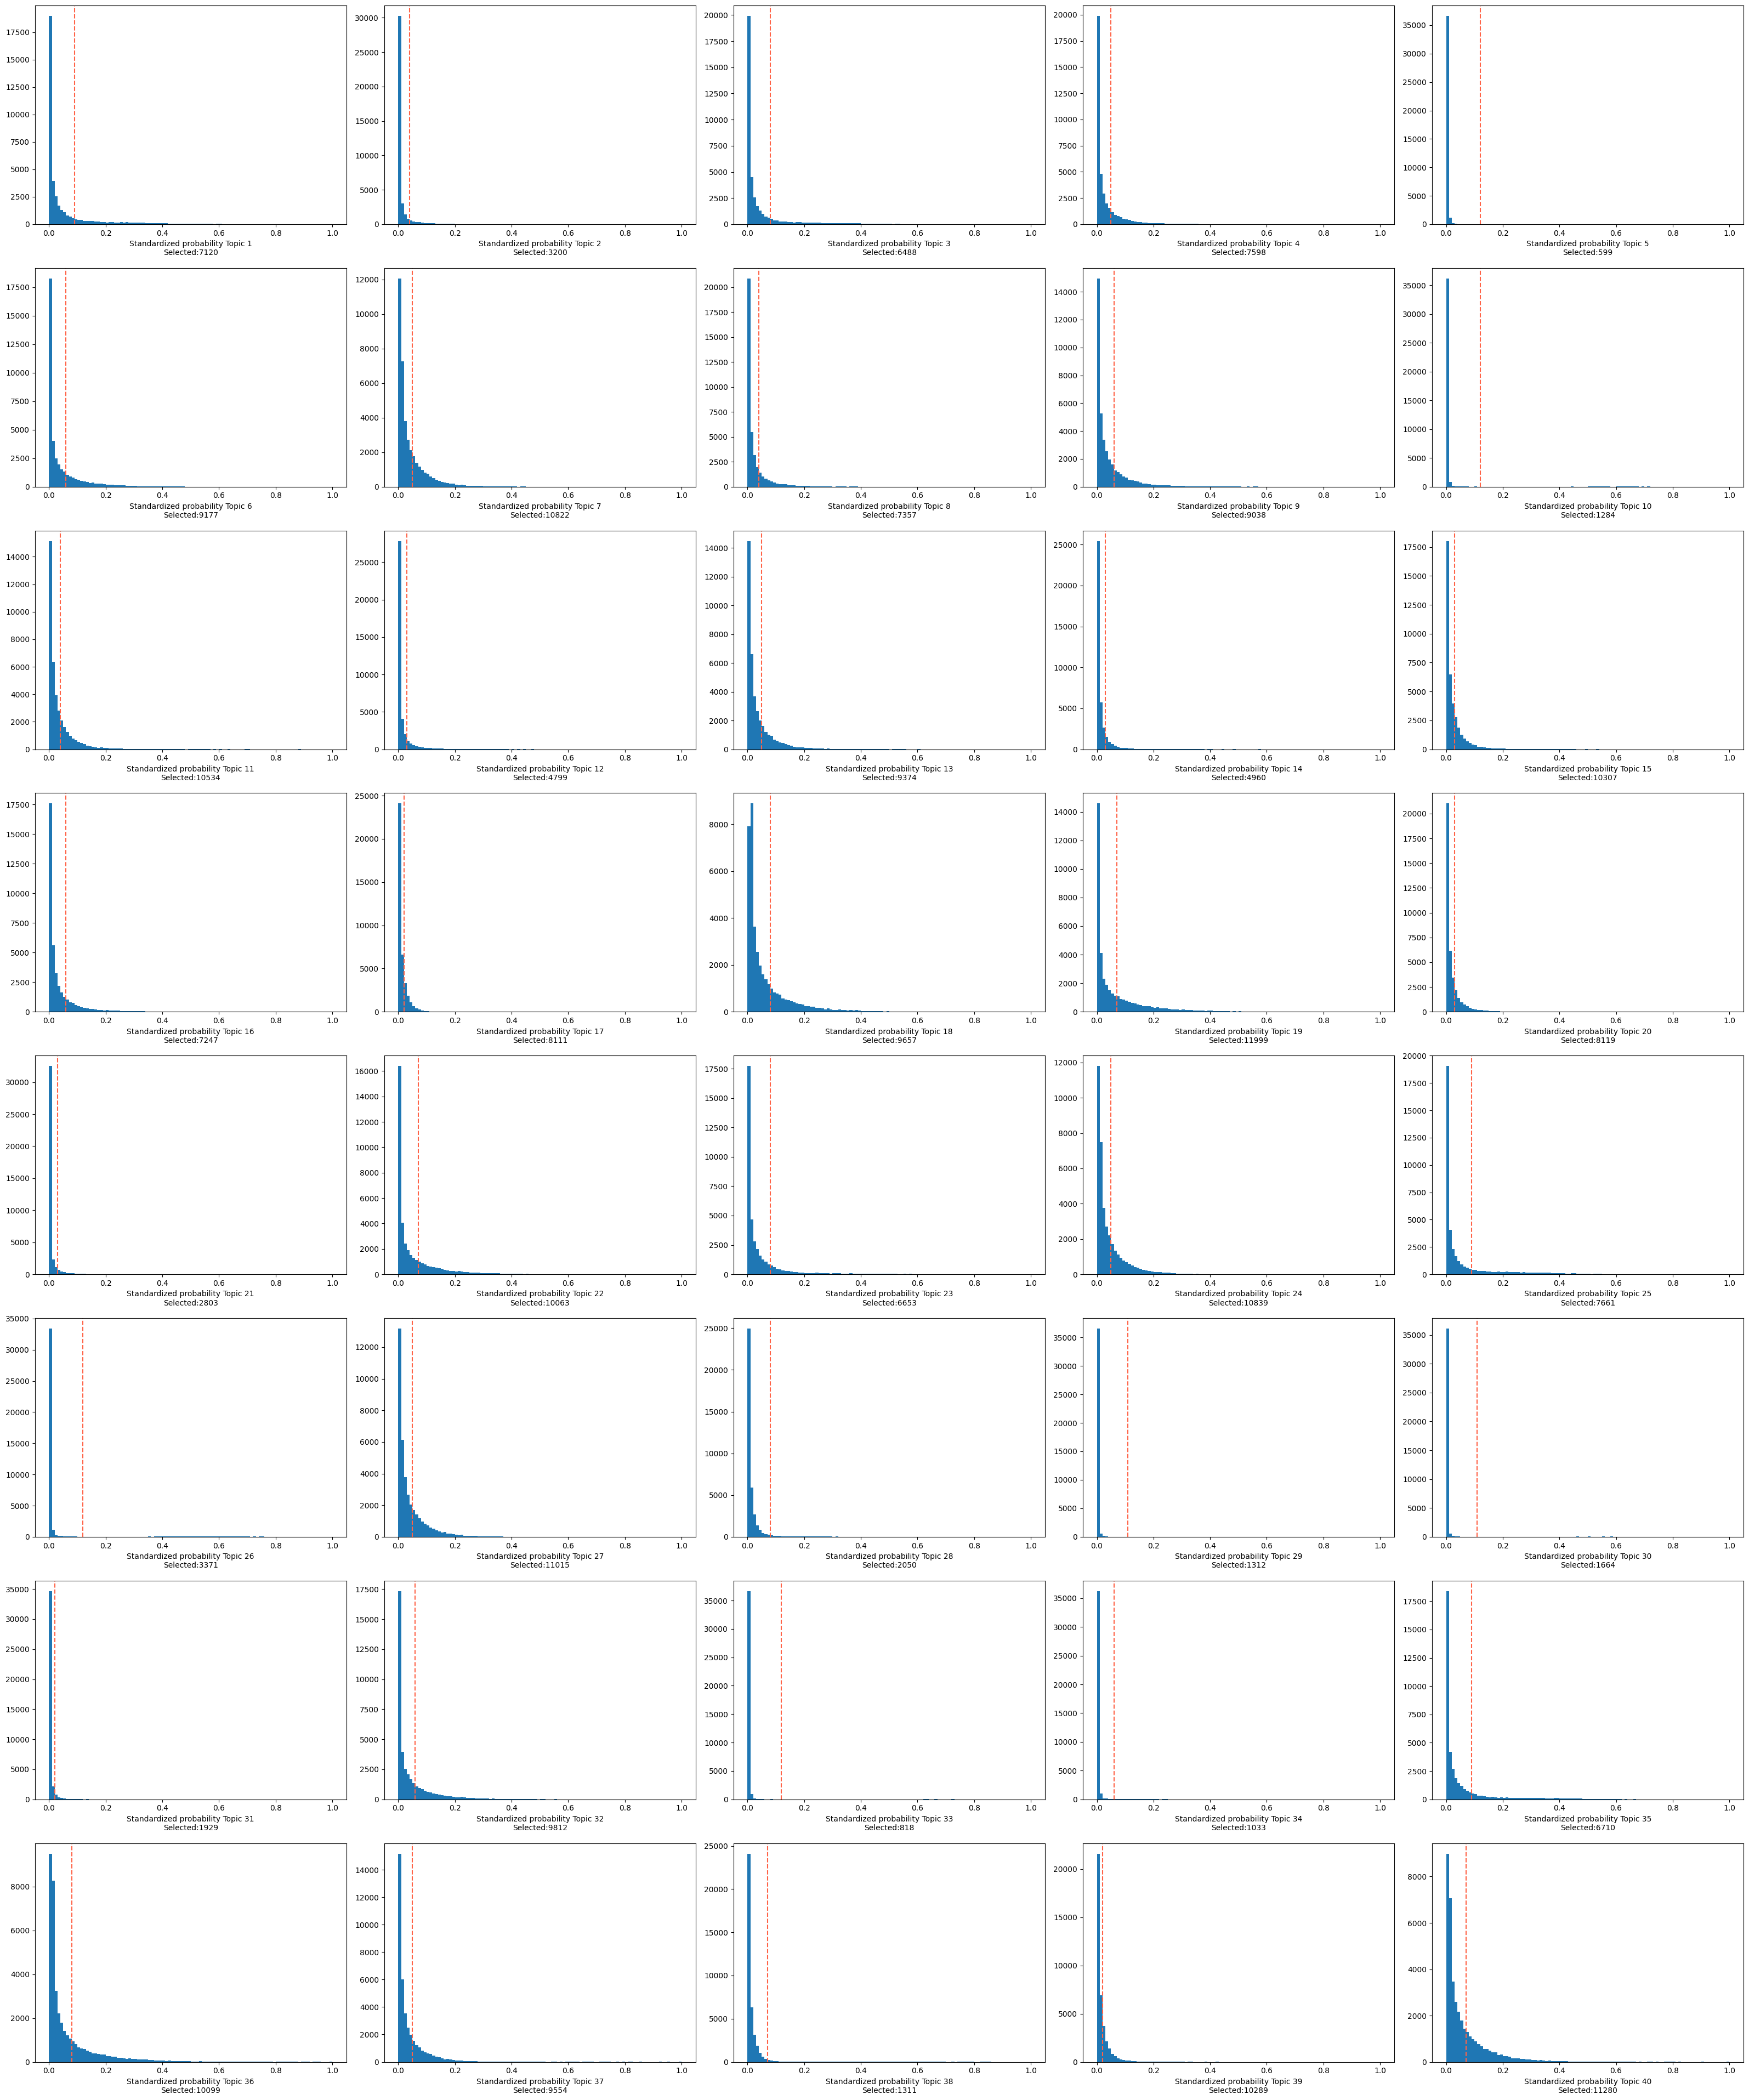

In [34]:
binarized_cell_topic = binarize_topics(
    cistopic_obj,
    target='cell',
    method='li',
    plot=True,
    num_columns=5, nbins=100)

In [35]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img

In [36]:
topic_qc_metrics = compute_topic_metrics(cistopic_obj)

In [37]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

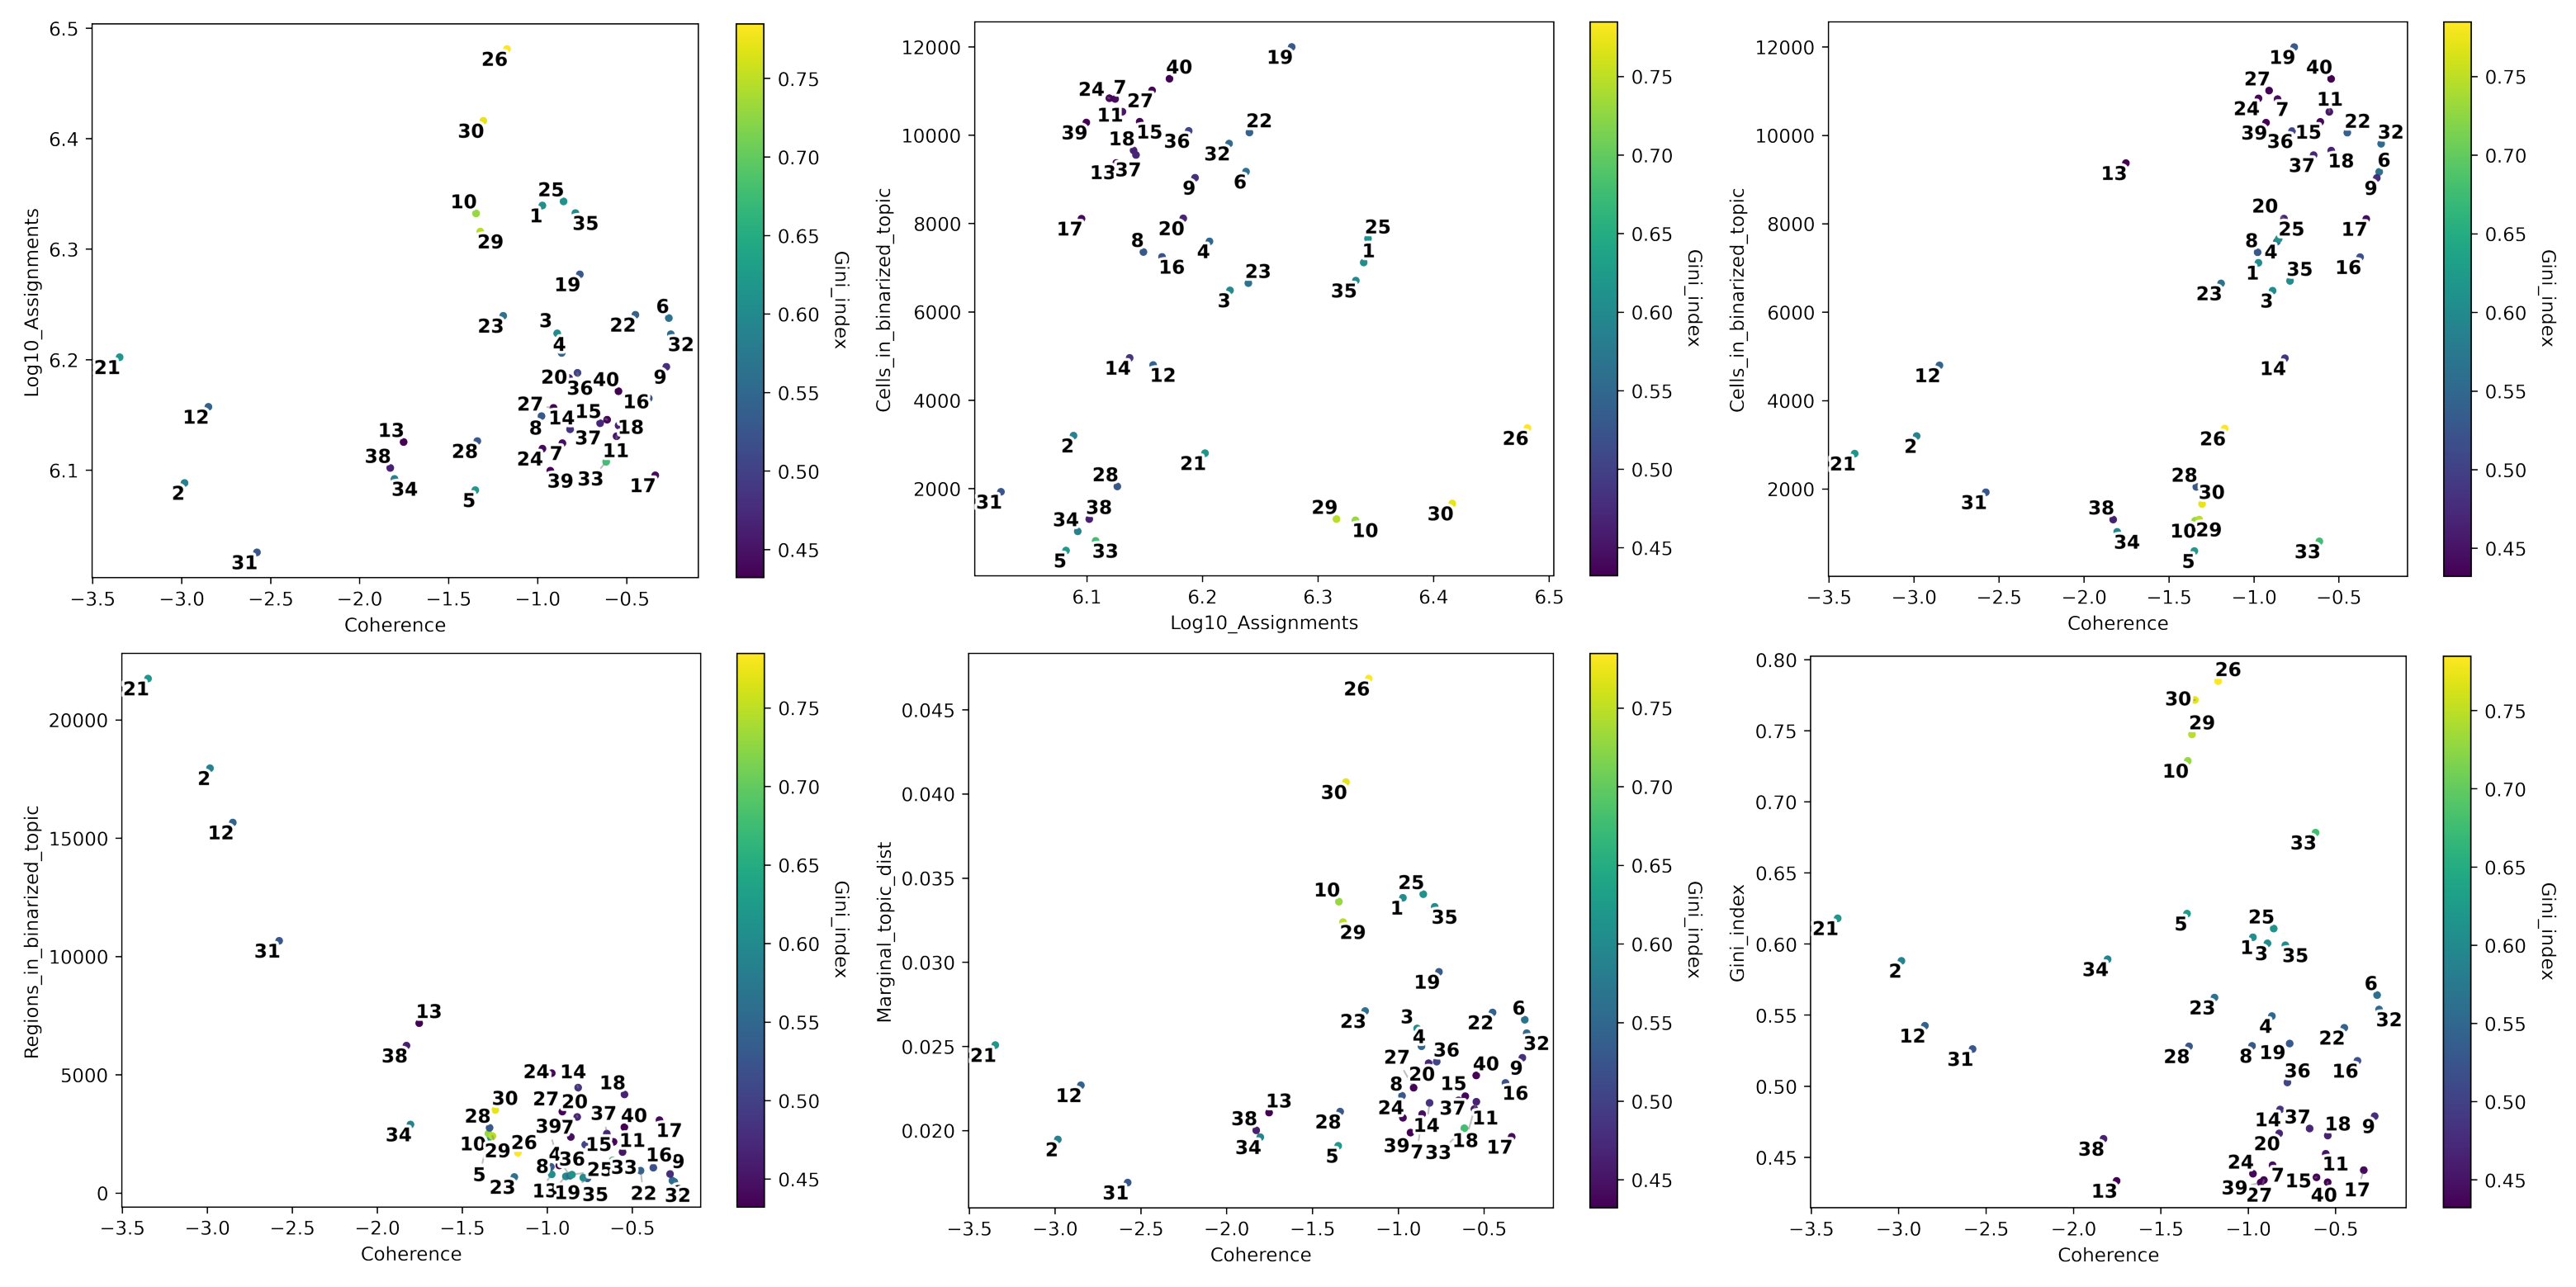

In [38]:
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()

In [39]:
topic_annot = topic_annotation(
    cistopic_obj,
    annot_var='celltype_assignment2',
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr = 0.2
)

/tscc/nfs/home/abhowell/miniconda3/envs/scenicplus/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [40]:
import pickle
with open('outs/cistopic_obj.pkl', 'rb') as file:
    # Load the pickled object
    cistopic_obj = pickle.load(file)

In [41]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np

In [42]:
imputed_acc_obj = impute_accessibility(
    cistopic_obj,
    selected_cells=None,
    selected_regions=None,
    scale_factor=10**6
)

2025-04-17 10:32:52,830 cisTopic     INFO     Imputing region accessibility
2025-04-17 10:32:52,831 cisTopic     INFO     Impute region accessibility for regions 0-20000
2025-04-17 10:32:58,271 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2025-04-17 10:33:03,648 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2025-04-17 10:33:09,033 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2025-04-17 10:33:14,423 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2025-04-17 10:33:15,887 cisTopic     INFO     Done!


In [43]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2025-04-17 10:33:15,890 cisTopic     INFO     Normalizing imputed data
2025-04-17 10:33:31,239 cisTopic     INFO     Done!


2025-04-17 10:33:31,242 cisTopic     INFO     Calculating mean
2025-04-17 10:33:34,483 cisTopic     INFO     Calculating variance


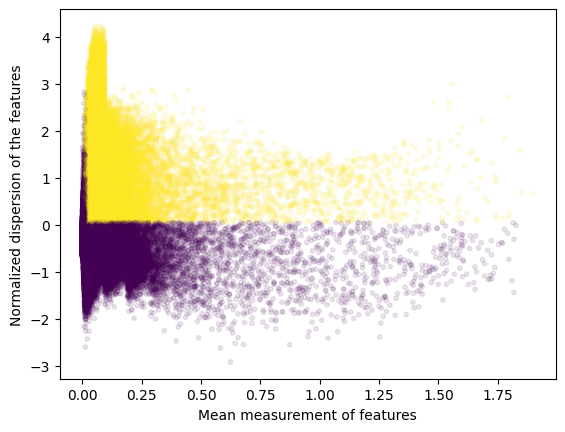

2025-04-17 10:33:55,740 cisTopic     INFO     Done!


In [44]:
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
)

In [45]:
markers_dict= find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='celltype_assignment2',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/tmp',
    split_pattern = '-'
)

2025-04-17 10:34:20,083	INFO worker.py:1724 -- Started a local Ray instance.


2025-04-17 10:34:20,634 cisTopic     INFO     Subsetting data for Acinar (25613 of 38789)
2025-04-17 10:34:24,200 cisTopic     INFO     Computing p-value for Acinar
2025-04-17 10:34:38,893 cisTopic     INFO     Computing log2FC for Acinar
2025-04-17 10:34:40,300 cisTopic     INFO     Acinar done!
2025-04-17 10:34:40,314 cisTopic     INFO     Subsetting data for Activated_stellate (1161 of 38789)
2025-04-17 10:34:40,407 cisTopic     INFO     Computing p-value for Activated_stellate
2025-04-17 10:34:47,291 cisTopic     INFO     Computing log2FC for Activated_stellate
2025-04-17 10:34:47,332 cisTopic     INFO     Activated_stellate done!
2025-04-17 10:34:47,351 cisTopic     INFO     Subsetting data for Alpha (499 of 38789)
2025-04-17 10:34:47,442 cisTopic     INFO     Computing p-value for Alpha
2025-04-17 10:34:54,756 cisTopic     INFO     Computing log2FC for Alpha
2025-04-17 10:34:54,795 cisTopic     INFO     Alpha done!
2025-04-17 10:34:54,814 cisTopic     INFO     Subsetting data for

In [46]:
from pycisTopic.clust_vis import plot_imputed_features

In [47]:
#threw an error when I tried to include Alpha because if you run markers_dict["Alpha"] there are no results
#you can fix this by changing features list
features=[markers_dict[x].index.tolist()[0] for x in ['Beta', 'T_cells']],

#markers_dict["Beta"]

In [48]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=imputed_acc_obj,
    features=[markers_dict[x].index.tolist()[0] for x in ['Alpha', 'T_cells']],
    scale=False,
    num_columns=1
)

KeyError: 'UMAP'

<Figure size 640x480 with 0 Axes>

In [49]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

Number of DARs found:
---------------------
  Acinar: 1957
  Activated_stellate: 9867
  Alpha: 7875
  B_cells: 7858
  Beta: 8011
  Delta: 8837
  Ductal: 5731
  Endothelial: 6451
  LymphEndo: 8455
  MUC5b_Ductal: 5349
  Macrophage: 8052
  Mast: 8346
  Quinscient_stellate: 7565
  Schwann: 10376
  T_cells: 5606


In [50]:
os.makedirs(os.path.join(out_dir, "region_sets"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_otsu"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_top_3k"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "DARs_cell_type"), exist_ok = True)

In [51]:
from pycisTopic.utils import region_names_to_coordinates

In [52]:
for topic in region_bin_topics_otsu:
    region_names_to_coordinates(
        region_bin_topics_otsu[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_otsu", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [53]:
for topic in region_bin_topics_top_3k:
    region_names_to_coordinates(
        region_bin_topics_top_3k[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_top_3k", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [54]:
for cell_type in markers_dict:
    region_names_to_coordinates(
        markers_dict[cell_type].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "DARs_cell_type", f"{cell_type}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [55]:
import pyranges as pr
from pycisTopic.gene_activity import get_gene_activity

In [56]:
chromsizes = pd.read_table("/tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/qc/hg38.chrom_sizes_and_alias.tsv")
chromsizes

# ucsc     length             ensembl     refseq_id  genbank_id
0                chr1  248956422                   1  NC_000001.11  CM000663.2
1                chr2  242193529                   2  NC_000002.12  CM000664.2
2                chr3  198295559                   3  NC_000003.12  CM000665.2
3                chr4  190214555                   4  NC_000004.12  CM000666.2
4                chr5  181538259                   5  NC_000005.10  CM000667.2
..                ...        ...                 ...           ...         ...
449  chrUn_KI270539v1        993  HSCHRUN_RANDOM_146   NT_187442.1  KI270539.1
450  chrUn_KI270385v1        990  HSCHRUN_RANDOM_195   NT_187487.1  KI270385.1
451  chrUn_KI270423v1        981  HSCHRUN_RANDOM_121   NT_187417.1  KI270423.1
452  chrUn_KI270392v1        971  HSCHRUN_RANDOM_193   NT_187485.1  KI270392.1
453  chrUn_KI270394v1        970  HSCHRUN_RANDOM_187   NT_187479.1  KI270394.1

[454 rows x 5 columns]

In [57]:
chromsizes.rename({"# ucsc": "Chromosome", "length": "End"}, axis = 1, inplace = True)
chromsizes["Start"] = 0
chromsizes = pr.PyRanges(chromsizes[["Chromosome", "Start", "End"]])

In [58]:
pr_annotation = pd.read_table(
        os.path.join("/tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/qc/tss.bed")
    ).rename(
        {"Name": "Gene", "# Chromosome": "Chromosome"}, axis = 1)
pr_annotation["Transcription_Start_Site"] = pr_annotation["Start"]
pr_annotation = pr.PyRanges(pr_annotation)
pr_annotation

+--------------+-----------+-----------+------------+------------+-------+
| Chromosome   | Start     | End       | Gene       | Score      | +3    |
| (category)   | (int32)   | (int32)   | (object)   | (object)   | ...   |
|--------------+-----------+-----------+------------+------------+-------|
| GL000009.2   | 58375     | 58376     | nan        | .          | ...   |
| GL000194.1   | 115017    | 115018    | nan        | .          | ...   |
| GL000194.1   | 115054    | 115055    | MAFIP      | .          | ...   |
| GL000195.1   | 49163     | 49164     | nan        | .          | ...   |
| ...          | ...       | ...       | ...        | ...        | ...   |
| chrY         | 6872607   | 6872608   | AMELY      | .          | ...   |
| chrY         | 21918031  | 21918032  | RBMY1E     | .          | ...   |
| chrY         | 24047968  | 24047969  | CDY1B      | .          | ...   |
| chrY         | 24048018  | 24048019  | CDY1B      | .          | ...   |
+--------------+-----------+-----------+------------+------------+-------+
Stranded PyRanges object has 87,695 rows and 8 columns from 407 chromosomes.
For printing, the PyRanges was sorted on Chromosome and Strand.
3 hidden columns: Strand, Transcript_type, Transcription_Start_Site

In [59]:
gene_act, weigths = get_gene_activity(
    imputed_acc_obj,
    pr_annotation,
    chromsizes,
    use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
    upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it
                             # these bp will be taken (1kbp here)
    downstream=[1000,100000], # Search space downstream
    distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
    decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
    extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for
                          #this weight)
    extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
    gene_size_weight=False, # Whether to add a weights based on the length of the gene
    gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                          #in the genome
    remove_promoters=False, # Whether to remove promoters when computing gene activity scores
    average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene
                          #activity score
    scale_factor=1, # Value to multiply for the final gene activity matrix
    extend_tss=[10,10], # Space to consider a promoter
    gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
    return_weights= True, # Whether to return the final weights
    project='Gene_activity') # Project name for the gene activity object

2025-04-17 10:37:17,120 cisTopic     INFO     Calculating gene boundaries
2025-04-17 10:37:29,913 cisTopic     INFO     Calculating distances


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2025-04-17 10:37:32,685 cisTopic     INFO     Calculating distance weigths
2025-04-17 10:37:33,013 cisTopic     INFO     Distance weights done
2025-04-17 10:37:33,014 cisTopic     INFO     Calculating gini weights
2025-04-17 10:37:46,997 cisTopic     INFO     Getting gene activity scores
2025-04-17 10:38:11,076 cisTopic     INFO     Creating imputed features object


In [60]:
DAG_markers_dict= find_diff_features(
    cistopic_obj,
    gene_act,
    variable='celltype_assignment2',
    var_features=None,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/tmp',
    split_pattern = '-')

2025-04-17 10:38:15,884	INFO worker.py:1724 -- Started a local Ray instance.


2025-04-17 10:38:16,386 cisTopic     INFO     Subsetting data for Acinar (25613 of 38789)
2025-04-17 10:38:18,382 cisTopic     INFO     Computing p-value for Acinar
2025-04-17 10:38:24,728 cisTopic     INFO     Computing log2FC for Acinar
2025-04-17 10:38:25,885 cisTopic     INFO     Acinar done!
2025-04-17 10:38:25,904 cisTopic     INFO     Subsetting data for Activated_stellate (1161 of 38789)
2025-04-17 10:38:25,981 cisTopic     INFO     Computing p-value for Activated_stellate
2025-04-17 10:38:30,909 cisTopic     INFO     Computing log2FC for Activated_stellate
2025-04-17 10:38:30,938 cisTopic     INFO     Activated_stellate done!
2025-04-17 10:38:30,957 cisTopic     INFO     Subsetting data for Alpha (499 of 38789)
2025-04-17 10:38:31,030 cisTopic     INFO     Computing p-value for Alpha
2025-04-17 10:38:36,409 cisTopic     INFO     Computing log2FC for Alpha
2025-04-17 10:38:36,437 cisTopic     INFO     Alpha done!
2025-04-17 10:38:36,456 cisTopic     INFO     Subsetting data for

In [61]:
print("Number of DAGs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(DAG_markers_dict[x])}")

Number of DAGs found:
---------------------
  Acinar: 1282
  Activated_stellate: 1903
  Alpha: 2058
  B_cells: 2990
  Beta: 2042
  Delta: 2315
  Ductal: 1287
  Endothelial: 1864
  LymphEndo: 2052
  MUC5b_Ductal: 1164
  Macrophage: 2443
  Mast: 2249
  Quinscient_stellate: 2059
  Schwann: 2438
  T_cells: 2448


In [ ]:
#step 2
#convert reading in raw matrix step to pulling data from already processed Seurat object

In [109]:
#use matrix file you created from R script
import scanpy as sc
import pandas as pd
rna_counts = sc.read_mtx("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_rna_counts.mtx")
rna_counts = rna_counts.T.copy()

In [110]:
rna_cell_meta = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_meta_data.tsv", sep="\t", header=0, index_col=0)
rna_gene_names = pd.read_csv("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/npod1_gene_names.tsv", sep="\t", header=None, index_col=0)
rna_gene_names.index.name = None

In [111]:
rna_counts.obs = rna_cell_meta
rna_counts.var = rna_gene_names

In [112]:
rna_counts.raw = rna_counts.copy()
sc.pp.normalize_total(rna_counts, target_sum=1e4)
sc.pp.log1p(rna_counts)
sc.pp.highly_variable_genes(rna_counts, min_mean=0.0125, max_mean=3, min_disp=0.5)
rna_counts = rna_counts[:, rna_counts.var.highly_variable]
sc.pp.scale(rna_counts, max_value=10)

/tscc/nfs/home/abhowell/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


... storing 'orig.ident' as categorical
... storing 'samples' as categorical
... storing 'sex' as categorical
... storing 'condition' as categorical
... storing 'celltype_assignment1' as categorical
... storing 'SeuratClusters' as categorical
... storing 'celltype_assignment2' as categorical
... storing 'barcode' as categorical
... storing 'CurrentObjLabels' as categorical
... storing 'nPOD_ID' as categorical
... storing 'technology' as categorical
/tscc/nfs/home/abhowell/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


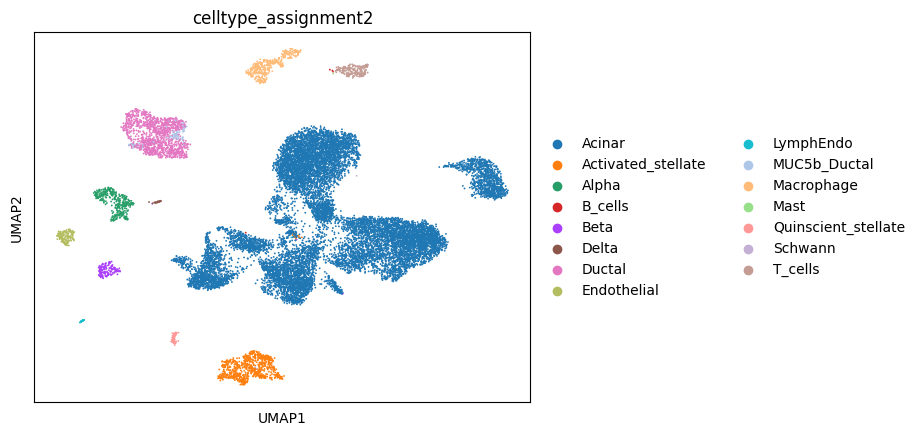

In [113]:
sc.tl.pca(rna_counts)
sc.pp.neighbors(rna_counts)
sc.tl.umap(rna_counts)
sc.pl.umap(rna_counts, color="celltype_assignment2")

In [18]:
rna_counts.write("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/rna_counts.h5ad")

In [118]:
#IF YOU GET AN ERROR WITH SCENIC+ STEP AT rule prepare_GEX_ACC_multiome:
#It does not like something between the cistopic_obj.pkl and adata.h5ad that prevents it from creating the ACC_GEX.h5mu 
#probably labels are diff have to go back in, reopen in notebook, and look
#this is what needs to match 
#you got this from line 71 of this script https://github.com/aertslab/scenicplus/blob/main/src/scenicplus/data_wrangling/adata_cistopic_wrangling.py#L11
#if this doesnt match somethings up it'll throw a fit at scenic+ step
len(set(cistopic_obj.cell_names) & set(rna_counts.obs_names))

17126

In [13]:
samples = [cb.rsplit("_", 1)[0] for cb in rna_counts.obs_names]
barcodes = [cb.rsplit("_", 1)[1] for cb in rna_counts.obs_names]

new_index = [str(i) + '-' + str(j) for i, j in zip(barcodes, samples)]
rna_counts.obs_names = new_index
rna_counts = rna_counts

In [19]:
import anndata as ad, scanpy as sc
rna_counts = ad.read("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/rna_counts.h5ad")

/tscc/nfs/home/abhowell/miniconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [1]:
import pickle
with open('/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs/cistopic_obj.pkl', 'rb') as file:
    # Load the pickled object
    cistopic_obj = pickle.load(file)

In [21]:
len(set(cistopic_obj.cell_names) & set(rna_counts.obs_names))

17126

In [ ]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['Seurat_cell_type', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [120]:
#later scenic steps the topic modelling barcodes can also be an issue
#error at line 78 https://github.com/aertslab/scenicplus/blob/main/src/scenicplus/data_wrangling/adata_cistopic_wrangling.py#L11
# "None of [Index(['AAGCGAATCGCTAGCA-1-MM_661', in column
#imputed_acc_obj = impute_accessibility(
#        cisTopic_obj, selected_cells=common_cells, **imputed_acc_kwargs)
#follow error to line 380 https://github.com/aertslab/pycisTopic/blob/main/src/pycisTopic/diff_features.py 
#the cell names in LDA model still had extra ___ tag
#cistopic_obj.selected_model.cell_topic.columns = cistopic_obj.selected_model.cell_topic.columns.str.split('__').str[0]
#cistopic_obj.cell_data.index
#cistopic_obj.selected_model.cell_topic

In [78]:
#other handy code snippets in case you need to change other things around
#adata.obs.index = adata.obs.index + '-' + adata.obs['condition'].astype(str)
#cell_data.index = [cb.rsplit("-", 1)[0] for cb in cell_data.index]
#adata = adata[list(set(adata.obs_names) & set(cell_data.index))].copy()
#adata.obs = cell_data.loc[adata.obs_names]

In [440]:
#takes a few minutes 

#run on tscc
#tmux attach -t cb
#srun --mem 1000GB -t 4-00:00:00 -p condo -q condo -A csd854 --pty /bin/bash
#conda activate scenicplus
#module load bedtools2
#cd /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs
#/tscc/nfs/home/abhowell/create_cisTarget_databases/create_fasta_with_padded_bg_from_bed.sh /tscc/nfs/home/abhowell/cistarget_genomes/hg38.fa /tscc/nfs/home/abhowell/cistarget_genomes/hg38.chrom.sizes /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs/consensus_peak_calling/consensus_regions.bed T1Dearly.with_1kb_bg_padding.fa 1000 yes

In [ ]:
#take a few hours - MUST be run with 40 cores 
#see /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs/cbust_run.sh

#ls aertslab_motif_colleciton/v10nr_clust_public/singletons > motifs.txt
#mv motifs.txt cistarget_genomes/
#conda activate scenicplus
#conda install -c conda-forge python-flatbuffers
#have to modify line 301 to cluster_buster_path
#/tscc/nfs/home/abhowell/create_cisTarget_databases/create_cistarget_motif_databases.py -f /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs/T1Dearly.with_1kb_bg_padding.fa -M /tscc/nfs/home/abhowell/aertslab_motif_colleciton/v10nr_clust_public/singletons -m /tscc/nfs/home/abhowell/cistarget_genomes/motifs.txt -o /tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs --bgpadding 1000 -t 20

In [ ]:
#import os
#os.chdir("/tscc/projects/ps-gaultonlab/projects/npod1/cellranger_output/Multiome/Combined/outs")

In [ ]:
#import mudata
#scplus_mdata = mudata.read("scplusmdata.h5mu")

In [ ]:
#scplus_mdata.uns["direct_e_regulon_metadata"]

In [ ]:
#scplus_mdata.uns["extended_e_regulon_metadata"]


In [ ]:
#import scanpy as sc
#import anndata
#eRegulon_gene_AUC = anndata.concat(
#    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"]],
#    axis = 1,
#)

#eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]
#sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")
#sc.tl.umap(eRegulon_gene_AUC)
#sc.pl.umap(eRegulon_gene_AUC, color = "scRNA_counts:celltype_assignment2")

In [ ]:
#from scenicplus.plotting.dotplot import heatmap_dotplot
#heatmap_dotplot(
#    scplus_mudata = scplus_mdata,
#    color_modality = "direct_gene_based_AUC",
#    size_modality = "direct_region_based_AUC",
#    group_variable = "scRNA_counts:celltype_assignment2",
#    eRegulon_metadata_key = "direct_e_regulon_metadata",
#    color_feature_key = "Gene_signature_name",
#    size_feature_key = "Region_signature_name",
#    feature_name_key = "eRegulon_name",
#    sort_data_by = "direct_gene_based_AUC",
#    orientation = "horizontal",
#    figsize = (16, 5)
#)